# **`Final Project` : Introduction To Machine Learning**

### **BY:**
- `Matan ******` | *********
- `Asaf Biran` | 316354984


In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_auc_score, confusion_matrix, roc_curve, classification_report, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configurations
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

start time

In [2]:
start = time.perf_counter()

# Load Data

We will load the provided `train.csv` and `test.csv` datasets.  
We will first inspect their structure and check for basic data issues.


In [3]:
# Load data
raw_df = pd.read_csv('train.csv')
df = raw_df.copy()

# Quick look at train data
print("Train data shape:", df.shape)
df.head()


Train data shape: (27676, 21)


,customer_id,Age,Employment_Type,A,Education_Level,Years_of_Education,Marital_Status,Job_Type,Household_Role,Ethnicity,Gender,Investment_Gain,Investment_Loss,Weekly_Work_Hours,Country_of_Residence,C,Preferred_Communication_Method,D,B,E,Loan_Approval
0,115892,90.0,?,77053,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40,United-States,104.906221,Phone_Call,2.865629,NaN,170.887465,0
1,115893,82.0,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18,United-States,96.358501,mail,5.528583,NaN,156.630201,0
2,115895,54.0,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40,United-States,115.529631,mail,3.816915,NaN,165.635557,0
3,115896,41.0,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40,United-States,85.732506,NaN,5.416363,NaN,123.379007,0
4,115897,34.0,Private,216864,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,NaN,3770.0,45,United-States,115.218443,Mail,6.453932,NaN,155.262131,0


## Basic Data Information

We will display the basic structure of the dataset:
- Number of rows and columns
- Data types
- Missing values per column


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27676 entries, 0 to 27675
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     27676 non-null  int64  
 1   Age                             27541 non-null  float64
 2   Employment_Type                 27388 non-null  object 
 3   A                               27676 non-null  int64  
 4   Education_Level                 27676 non-null  object 
 5   Years_of_Education              27122 non-null  float64
 6   Marital_Status                  27676 non-null  object 
 7   Job_Type                        25729 non-null  object 
 8   Household_Role                  27676 non-null  object 
 9   Ethnicity                       24912 non-null  object 
 10  Gender                          27676 non-null  object 
 11  Investment_Gain                 26846 non-null  float64
 12  Investment_Loss                 

## Summary Statistics of Numerical Features

We will display summary statistics for the numerical variables:
- Central tendency
- Spread (std, IQR)
- Potential outliers


In [5]:
df.describe()


,customer_id,Age,A,Years_of_Education,Investment_Gain,Investment_Loss,Weekly_Work_Hours,C,D,B,E,Loan_Approval
count,27676.000000,27541.000000,2.767600e+04,27122.000000,26846.000000,27647.000000,27676.000000,26561.000000,27676.000000,0.0,24389.000000,27676.000000
mean,132196.289854,38.597727,1.898849e+05,10.079972,1091.680101,86.084458,40.482151,99.957601,4.987450,NaN,139.251615,0.240786
std,9399.839425,13.636965,1.053593e+05,2.575332,7482.292675,400.504134,12.371156,9.911054,1.511751,NaN,13.708225,0.427569
min,115892.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,58.136513,-1.711896,NaN,82.675954,0.000000
25%,124043.750000,28.000000,1.177652e+05,9.000000,0.000000,0.000000,40.000000,93.273986,3.968762,NaN,129.783073,0.000000
50%,132222.500000,37.000000,1.785870e+05,10.000000,0.000000,0.000000,40.000000,99.903569,4.994815,NaN,139.078247,0.000000
75%,140322.500000,48.000000,2.376340e+05,12.000000,0.000000,0.000000,45.000000,106.636563,5.999440,NaN,148.488675,0.000000
max,148452.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,144.309842,10.876204,NaN,199.134411,1.000000


## Identify Categorical and Numerical Columns

We identify the categorical and numerical columns to guide the EDA process.  
We also create subsets of the data:
- `approved_df`: Loan_Approval == 1
- `rejected_df`: Loan_Approval == 0


In [6]:
cat_cols = df.columns[df.dtypes == "object"]
num_cols = df.columns[df.dtypes != "object"]

approved_df = df[df['Loan_Approval'] == 1]
rejected_df = df[df['Loan_Approval'] == 0]

scaler = StandardScaler()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: Index(['Employment_Type', 'Education_Level', 'Marital_Status', 'Job_Type',
       'Household_Role', 'Ethnicity', 'Gender', 'Country_of_Residence',
       'Preferred_Communication_Method'],
      dtype='object')
Numerical columns: Index(['customer_id', 'Age', 'A', 'Years_of_Education', 'Investment_Gain',
       'Investment_Loss', 'Weekly_Work_Hours', 'C', 'D', 'B', 'E',
       'Loan_Approval'],
      dtype='object')


Checking if there are observations that have a lot of missing values, and should be dropped:

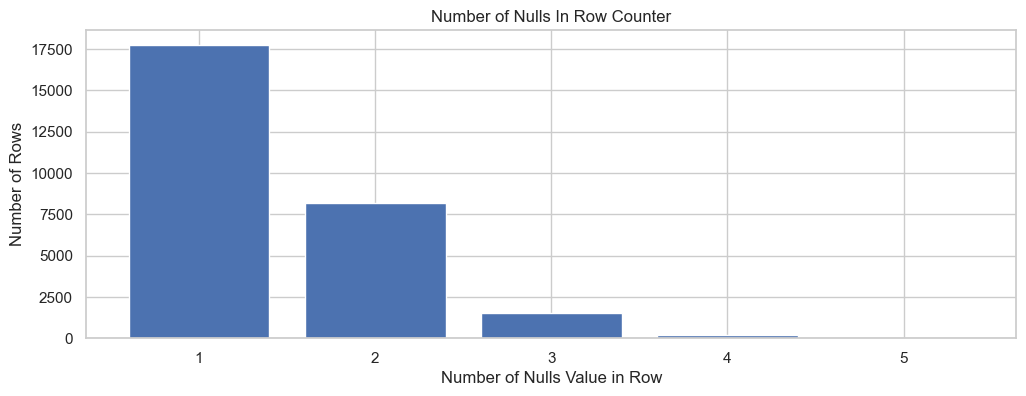

In [7]:
null_rows = df.isnull().sum(axis=1).value_counts()
plt.figure(figsize=(12,4))
plt.bar(x = null_rows.index, height = null_rows)
plt.title('Number of Nulls In Row Counter')
plt.xlabel('Number of Nulls Value in Row')
plt.ylabel('Number of Rows')
plt.show()

# Explore Numeric Columns

## Initial Correlation Heatmap:

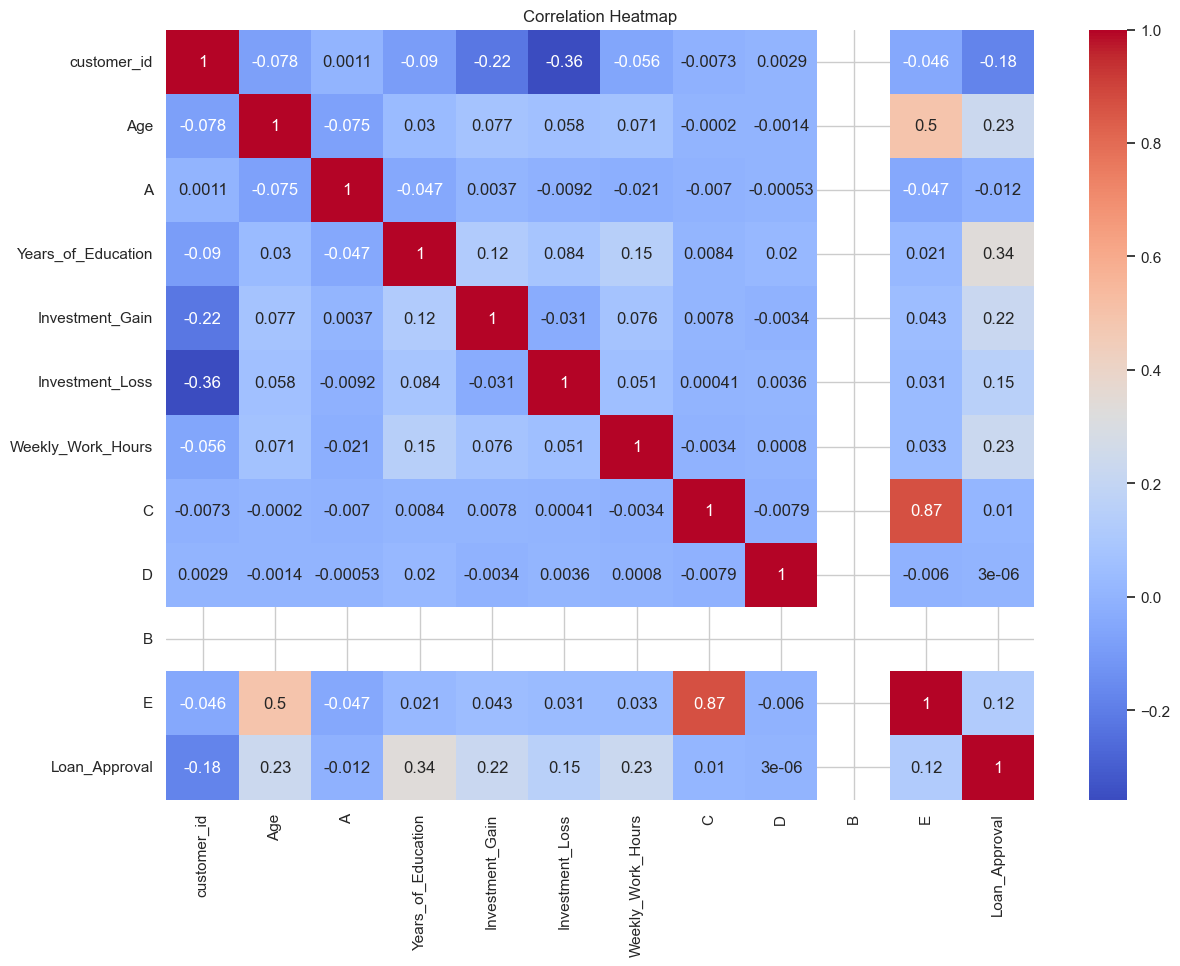

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Observations:
- `B` looks like an empty column.
- `C` and `E` have a very high correlation.
- we will explore this columns in depth later.

## Features:

In [9]:
def feature_analyze(df, feature, bins=15):
    """
    Plots histogram, displays descriptive stats, prints nulls and outliers summary,
    and returns the DataFrame containing outliers in the given feature.
    
    Parameters:
        df      : pandas DataFrame
        feature : str, column name
        bins    : int, number of bins for histogram
        
    Returns:
        outliers_df : DataFrame containing outlier rows
    """
    # Plot distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, kde=True, bins=bins)
    plt.title(f"{feature} Distribution")
    plt.show()

    # Describe statistics for all + by class if available
    col_describe = pd.DataFrame({'Total': df[feature].describe(),
                                 'Approved': df.loc[df['Loan_Approval'] == 1, feature].describe(),
                                 'Rejected': df.loc[df['Loan_Approval'] == 0, feature].describe()})
    
    display(col_describe)

    # Null count
    null_count = df[feature].isnull().sum()
    print(f'None Count: {null_count} ({round(null_count / len(df) * 100, 3)}% from total)')

    # IQR calculation
    Q1 = col_describe['Total']['25%']
    Q3 = col_describe['Total']['75%']
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[feature] < lb) | (df[feature] > ub)]

    print(f"Outliers Count: {len(outliers)} ({round(len(outliers) / len(df) * 100, 3)}% from total)")

    return (lb, ub)


### **Age:**

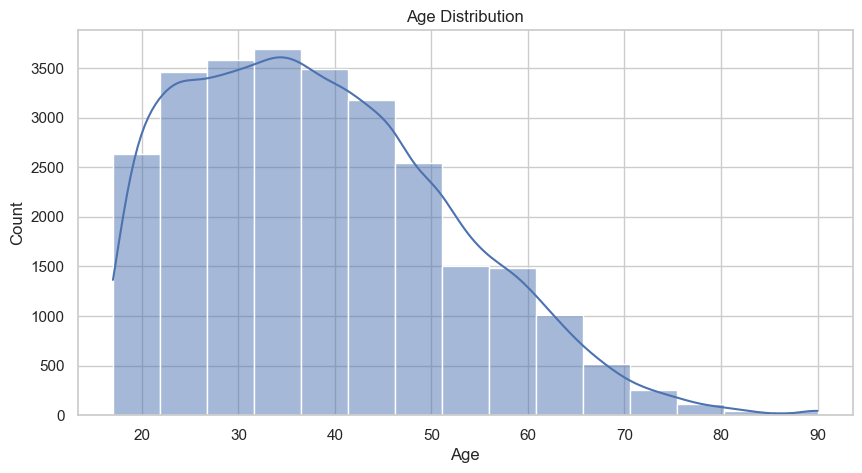

,Total,Approved,Rejected
count,27541.000000,6628.000000,20913.000000
mean,38.597727,44.271575,36.799503
std,13.636965,10.550640,14.006977
min,17.000000,19.000000,17.000000
25%,28.000000,37.000000,25.000000
50%,37.000000,43.000000,34.000000
75%,48.000000,51.000000,46.000000
max,90.000000,90.000000,90.000000


None Count: 135 (0.488% from total)
Outliers Count: 123 (0.444% from total)


In [10]:
age_bounds = feature_analyze(df, 'Age', bins=15)

In [11]:
# Median imputation for Age
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Capping outliers and scaling
df['Age_scaled'] = df['Age'].clip(lower = age_bounds[0], upper=age_bounds[1])
df['Age_scaled'] = scaler.fit_transform(df[['Age_scaled']])

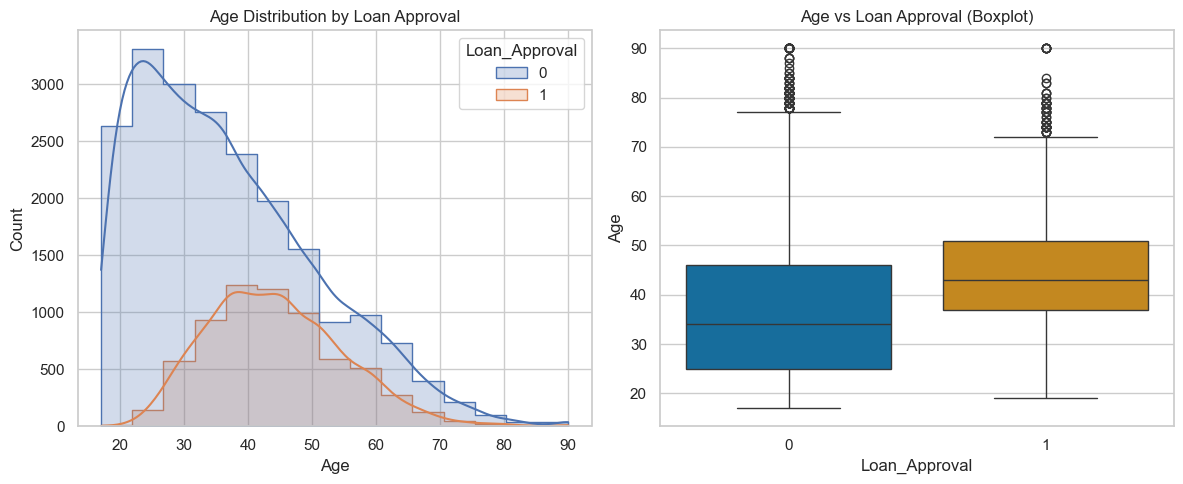

In [12]:
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue="Loan_Approval", kde=True, element="step", bins=15)
plt.title("Age Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Approval", y='Age', palette="colorblind")
plt.title("Age vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()


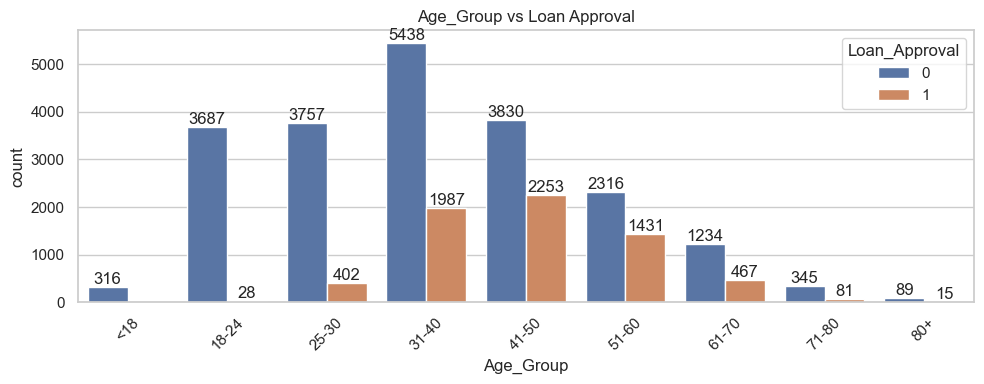

In [13]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 24, 30, 40, 50, 60, 70, 80, float('inf')], labels=['<18', '18-24', '25-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+'], right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Age_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"Age_Group vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

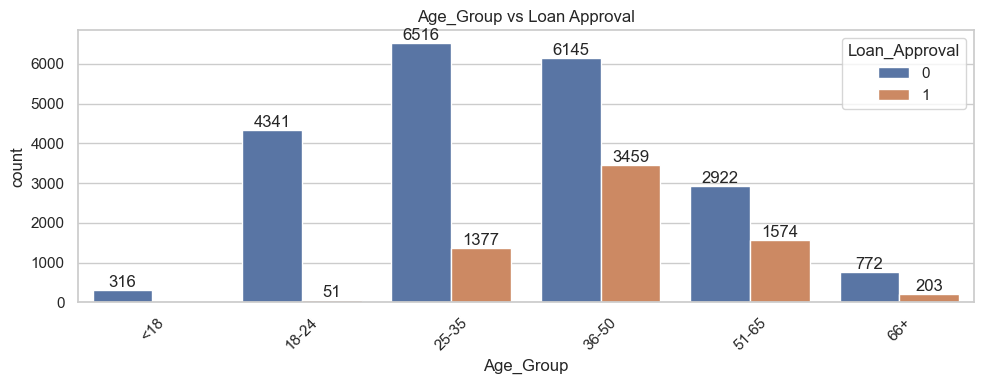

In [14]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 17, 24, 35, 50, 65, float('inf')], labels=['<18', '18-24', '25-35', '36-50', '51-65', '66+'])
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Age_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"Age_Group vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations - Age:

- Age is predictive of Loan Approval: younger applicants tend to have lower approval rates while mid ages (41-60) have higher approval rates.
- There are some natural grouping tendencies in Age, so we created Age_Group.
- Final bins chosen: <23, 23-31, 32-41, 42-51, 52-65, 65+, aligned with typical life stages and patterns seen in data.
- Missing values in Age (~0.5%) were imputed using the median. This choice is robust to outliers and appropriate given the relatively weak correlation between Age and other features (so we can't use Linear Regression or MICE for example).
- There are few outliers so we created Age_scaled - We capped the column by by IQR and scaled with StandartScaler.

### **Years of Education:**

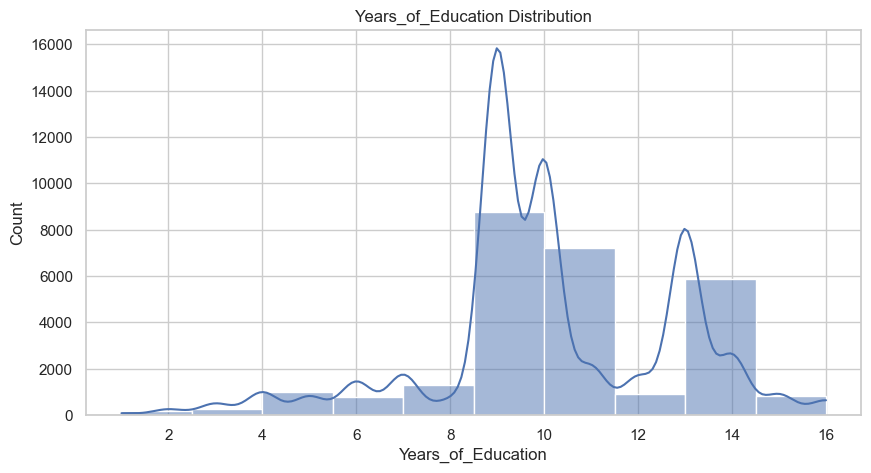

,Total,Approved,Rejected
count,27122.000000,6548.000000,20574.000000
mean,10.079972,11.609652,9.593127
std,2.575332,2.386775,2.438980
min,1.000000,2.000000,1.000000
25%,9.000000,10.000000,9.000000
50%,10.000000,12.000000,9.000000
75%,12.000000,13.000000,10.000000
max,16.000000,16.000000,16.000000


None Count: 554 (2.002% from total)
Outliers Count: 995 (3.595% from total)


In [15]:
Years_of_Education_bounds = feature_analyze(df, 'Years_of_Education', bins= 10)

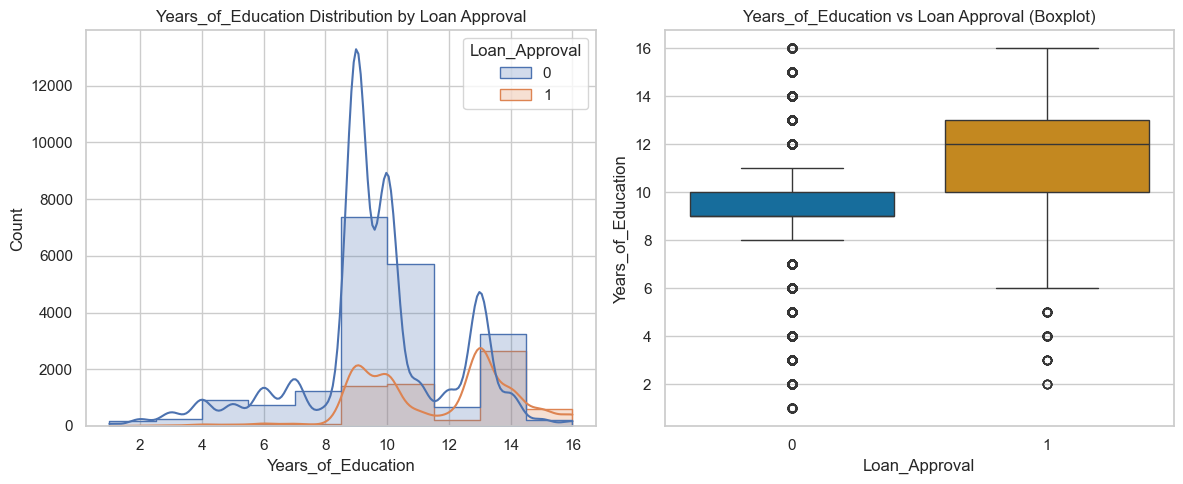

In [16]:
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Years_of_Education', hue="Loan_Approval", kde=True, element="step", bins=10)
plt.title(f"Years_of_Education Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Approval", y='Years_of_Education', palette="colorblind")
plt.title(f"Years_of_Education vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()



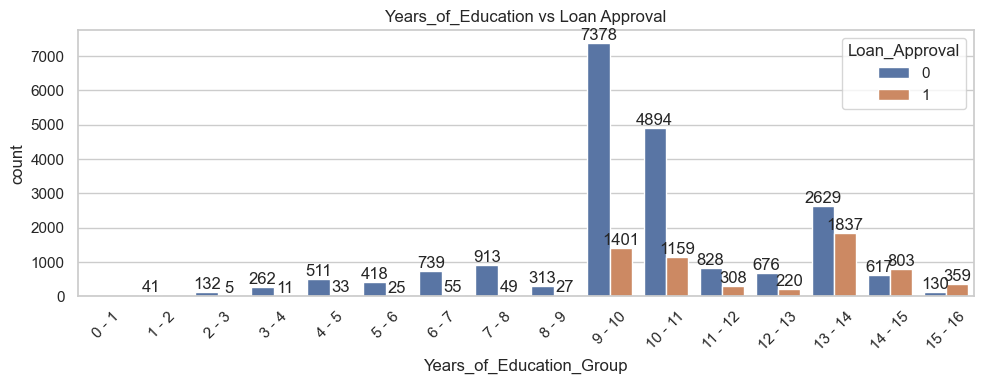

In [17]:
bins = [0] # these are used for determining the groups of years
labels = [] # labels to present in the plot
for i in range(1, 17):
    bins.append(i)
    labels.append(f'{i - 1} - {i}')
df['Years_of_Education_Group'] = pd.cut(df['Years_of_Education'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Years_of_Education_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"Years_of_Education vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

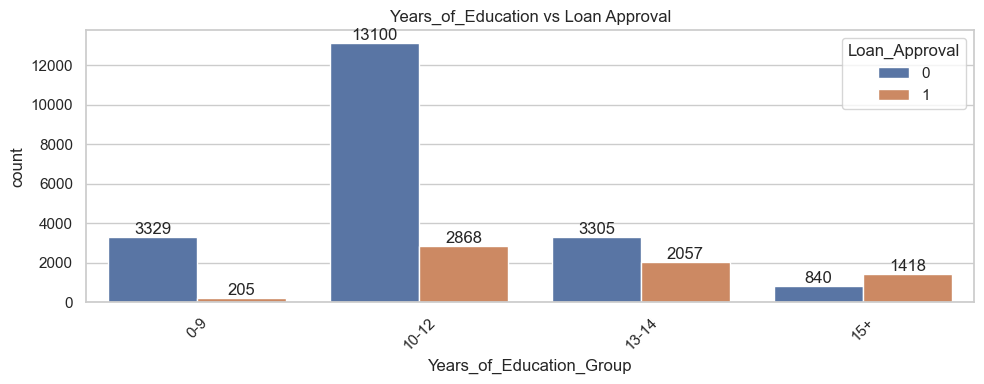

In [18]:
bins = [0, 9, 12, 14, float('inf')] 
labels = ['0-9', '10-12', '13-14', '15+']  # labels to present in the plot
df['Years_of_Education_Group'] = pd.cut(df['Years_of_Education'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Years_of_Education_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"Years_of_Education vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations – Years_of_Education:

- We retain the raw and grouped versions of this feature to support both numeric and categorical modeling strategies.
- We will check later the correlation with `Education_Level` to avoid redundancy, so we will handle missing values and outliers after checking the correlation and make sure we don't drop this column.

### **Investment_Gain:**

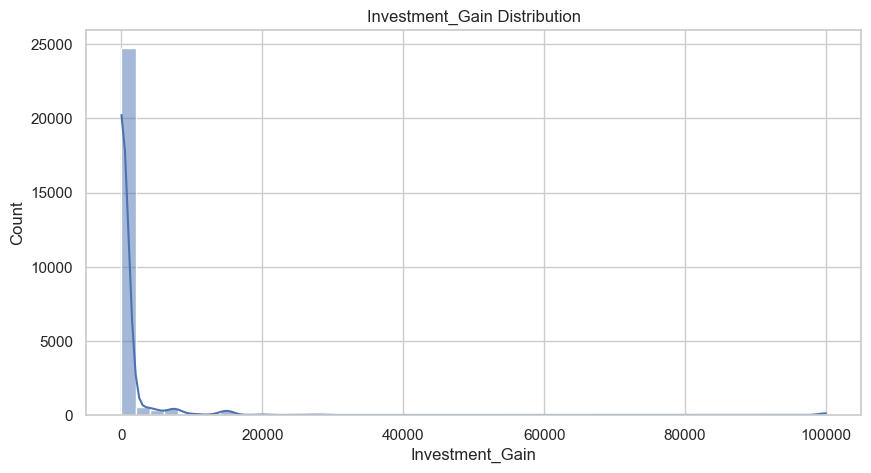

,Total,Approved,Rejected
count,26846.000000,6461.000000,20385.000000
mean,1091.680101,4063.642470,149.720383
std,7482.292675,14766.474606,969.505632
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,99999.000000,99999.000000,41310.000000


None Count: 830 (2.999% from total)
Outliers Count: 2237 (8.083% from total)


In [19]:
Investment_Gain_bounds = feature_analyze(df, 'Investment_Gain', bins= 50)

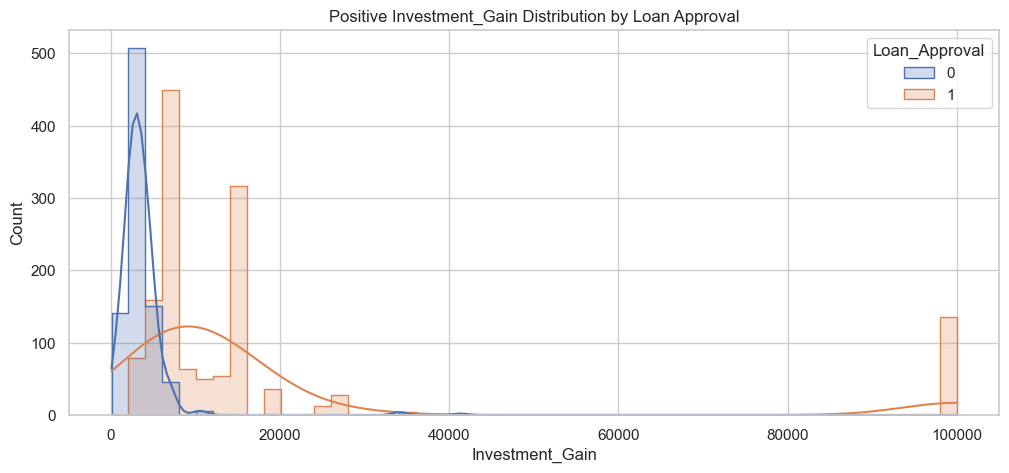

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df[df['Investment_Gain'] > 0], x='Investment_Gain', hue="Loan_Approval", kde=True, element="step", bins=50)
plt.title("Positive Investment_Gain Distribution by Loan Approval")
plt.show()

### **Investment_Loss:**

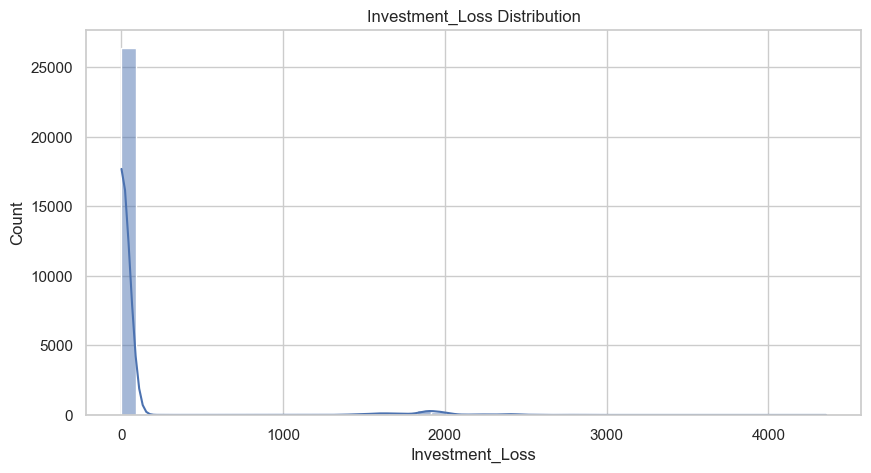

,Total,Approved,Rejected
count,27647.000000,6658.000000,20989.000000
mean,86.084458,194.222589,51.781552
std,400.504134,595.610052,306.400654
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4356.000000,3683.000000,4356.000000


None Count: 29 (0.105% from total)
Outliers Count: 1274 (4.603% from total)


In [21]:
Investment_Loss_bounds = feature_analyze(df, 'Investment_Loss', bins= 50)

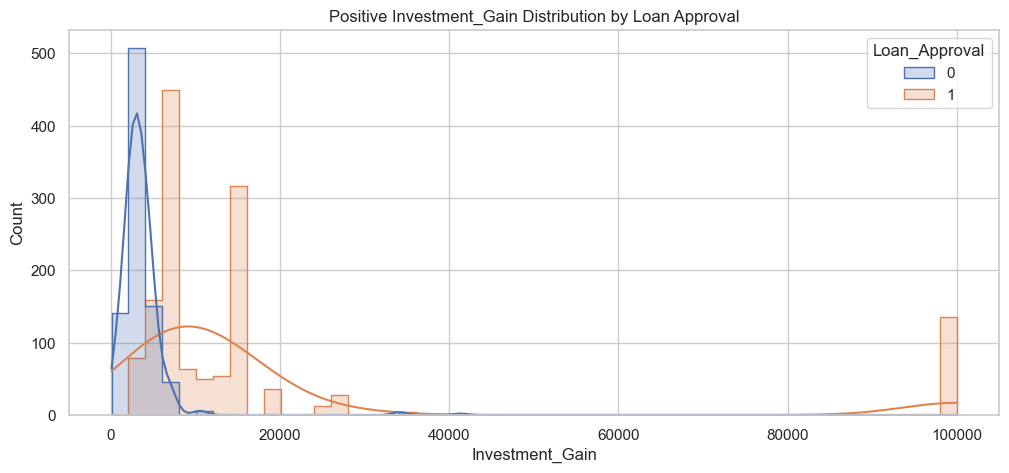

In [22]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df[df['Investment_Gain'] > 0], x='Investment_Gain', hue="Loan_Approval", kde=True, element="step", bins=50)
plt.title("Positive Investment_Gain Distribution by Loan Approval")
plt.show()

Relation between Investment_Gain and Investment_Loss:

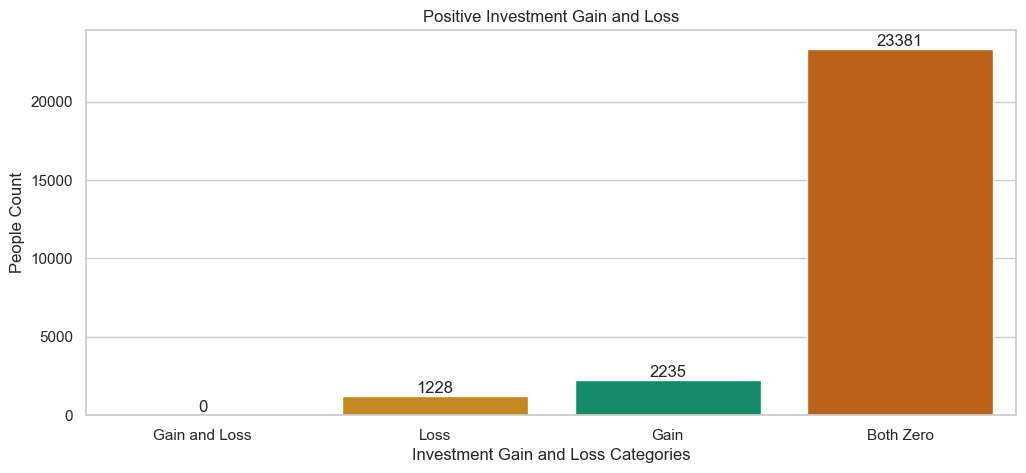

In [23]:
gain_and_loss = df[(df['Investment_Loss'] > 0) & (df['Investment_Gain'] > 0)]
loss = df[(df['Investment_Loss'] > 0) & (df['Investment_Gain'] == 0 | df['Investment_Gain'].isnull())]
gain = df[(df['Investment_Gain'] > 0) & (df['Investment_Loss'] == 0 | df['Investment_Loss'].isnull())]
zero_balance = df[((df['Investment_Loss'] == 0) | df['Investment_Loss'].isnull()) & (df['Investment_Gain'] == 0 | df['Investment_Gain'].isnull())]
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=['Gain and Loss', 'Loss', 'Gain', 'Both Zero'], y=[len(gain_and_loss), len(loss), len(gain), len(zero_balance)], palette='colorblind')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Positive Investment Gain and Loss")
plt.ylabel("People Count")
plt.xlabel("Investment Gain and Loss Categories")
plt.show()

Most of the values in the Investment Gain and loss are 0. In addition, there aren't any people who have positive values in both 'Gain' and 'Loss'. So we can fill the None with 0 and combine these two columns to one general column that contains the investment balance:

In [24]:
# Fill missing values with 0 (interpreted as no gain/loss)
df['Investment_Gain'] = df['Investment_Gain'].fillna(0)
df['Investment_Loss'] = df['Investment_Loss'].fillna(0)

# Recreate Investment_Balance
df['Investment_Balance'] = df['Investment_Gain'] - df['Investment_Loss']

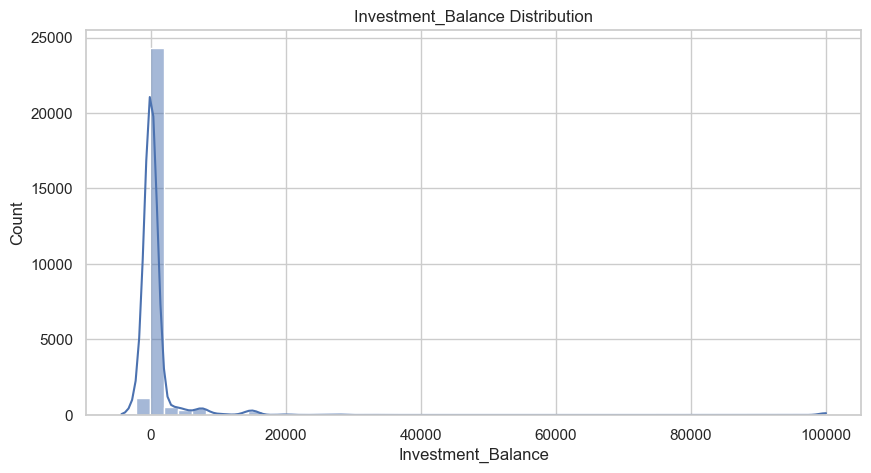

,Total,Approved,Rejected
count,27676.000000,6664.000000,21012.000000
mean,972.946488,3745.807323,93.527841
std,7394.776132,14621.116448,1010.618361
min,-4356.000000,-3683.000000,-4356.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,99999.000000,99999.000000,41310.000000


None Count: 0 (0.0% from total)
Outliers Count: 3511 (12.686% from total)


In [25]:
Investment_Balance_bounds = feature_analyze(df,'Investment_Balance', 50)

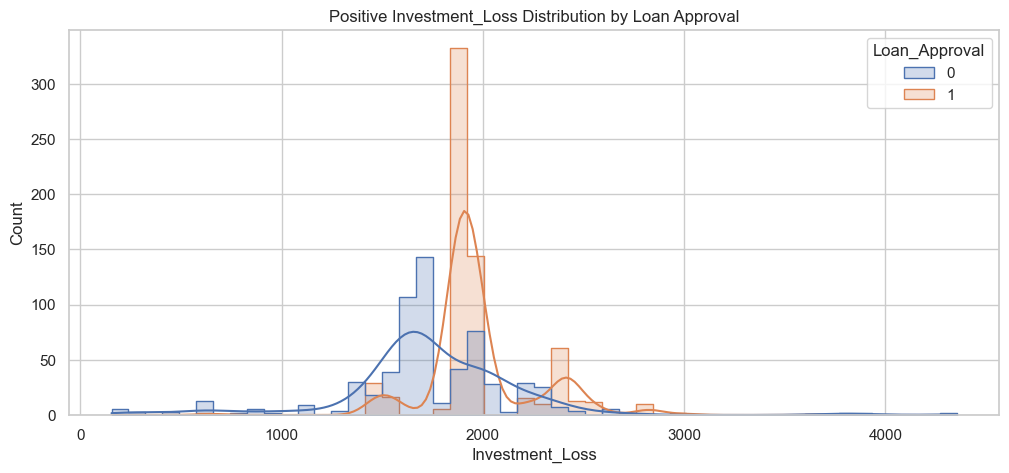

In [26]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df[df['Investment_Loss'] > 0], x='Investment_Loss', hue="Loan_Approval", kde=True, element="step", bins=50)
plt.title("Positive Investment_Loss Distribution by Loan Approval")
plt.show()

Missing Gain: 0
Missing Loss: 0
Missing Balance: 0


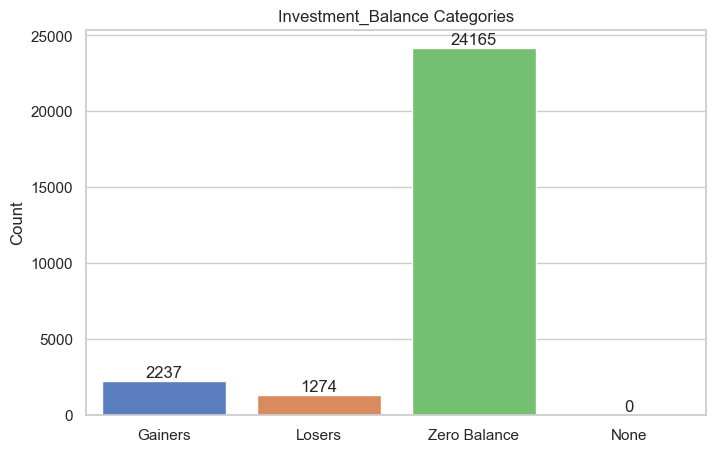

In [27]:

# Confirm all handled
print("Missing Gain:", df['Investment_Gain'].isnull().sum())
print("Missing Loss:", df['Investment_Loss'].isnull().sum())
print("Missing Balance:", df['Investment_Balance'].isnull().sum())

# Calculate counts
gainers_count = sum(df['Investment_Balance'] > 0)
losers_count = sum(df['Investment_Balance'] < 0)
zero_count = sum(df['Investment_Balance'] == 0)
none_count = df['Investment_Balance'].isnull().sum()

# Prepare data for plotting
categories = ['Gainers', 'Losers', 'Zero Balance', 'None']
counts = [gainers_count, losers_count, zero_count, none_count]

# Plot Investment_Balance distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=counts, palette='muted')
plt.title('Investment_Balance Categories')
plt.ylabel('Count')
for i, count in enumerate(counts):
    plt.text(i, count + max(counts) * 0.01, str(count), ha='center')
plt.show()



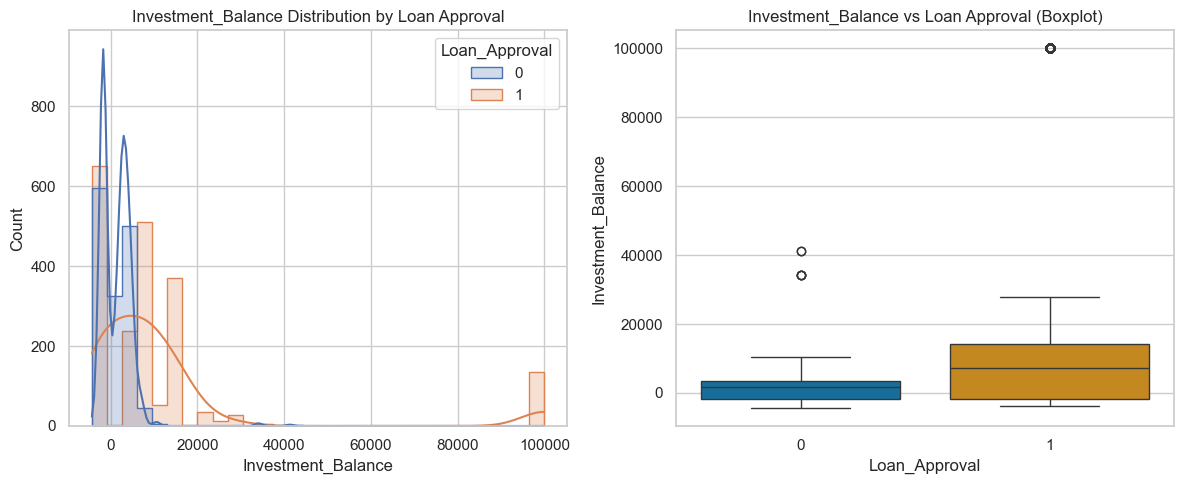

In [28]:
ib_df = df[df['Investment_Balance'] != 0]

plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=ib_df, x='Investment_Balance', hue="Loan_Approval", kde=True, element="step", bins=30)
plt.title(f"Investment_Balance Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=ib_df, x="Loan_Approval", y='Investment_Balance', palette="colorblind")
plt.title(f"Investment_Balance vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()



In [29]:
# Handle outliers and scale
lb = df['Investment_Balance'].quantile(0.01)
ub = df['Investment_Balance'].quantile(0.99)
df['Investment_Balance_scaled'] = df['Investment_Balance'].clip(lb,ub)
df['Investment_Balance_scaled'] = scaler.fit_transform(df[['Investment_Balance_scaled']])

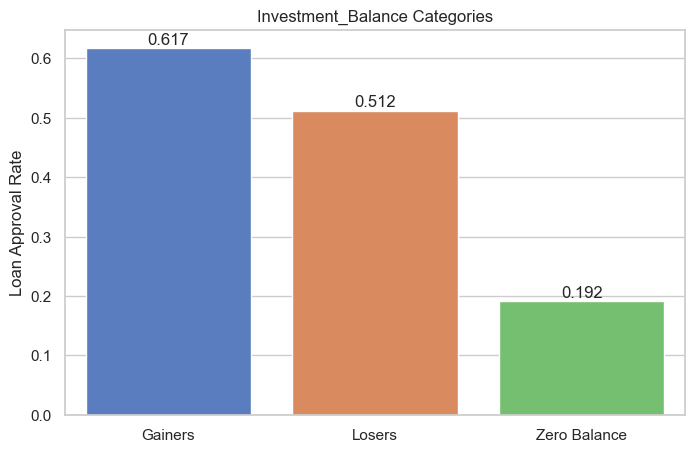

In [30]:
# Investment_Balance generalization 

def investment_type(row):
    if row['Investment_Balance'] > 0:
        return 'Gain'
    elif row['Investment_Balance'] < 0:
        return 'Loss'
    else:
        return 'Zero'

df['Investment_Type'] = df.apply(investment_type, axis=1)

app_rates = [round(df.loc[df['Investment_Type'] == 'Gain', 'Loan_Approval'].mean(), 3), 
             round(df.loc[df['Investment_Type'] == 'Loss', 'Loan_Approval'].mean(), 3),
             round(df.loc[df['Investment_Type'] == 'Zero', 'Loan_Approval'].mean(), 3)
             ]

# Plot Investment_Balance distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=['Gainers', 'Losers', 'Zero Balance'], y=app_rates, palette='muted')
plt.title('Investment_Balance Categories')
plt.ylabel('Loan Approval Rate')
for i, rate in enumerate(app_rates):
    plt.text(i, rate + max(app_rates) * 0.01, str(rate), ha='center')
plt.show()

The approval rates are high for gainers and losers, therefore maybe it will be informative to some models to know that the Investment_Balance is not 0.

In [31]:
# Create a column
df['Has_Investment'] = (df['Investment_Balance'] != 0).astype(int)

#### Observations – Investment Gain, Loss, and Balance

- Both features are right-skewed and zero-inflated.
- Missing values were filled with `0`, which reasonably represents "no gain/loss."
- We merged the columns to one column: `Investment_Balance = Gain - Loss` to avoid redundancy.
- Outliers (e.g., gain = 99,999) were retained, as they may strongly influence loan approval and reflect genuine investment success/failure.
- We created `Investment_Balance_scaled` column - We decided to clip the top and bottom percentiles (and not by IQR) because IQR clips to much observations in this feature and make it less informative. Then we scaled with StandartScaler.
- We Created the features `Investment_Type` and `Has_Investment`. The new features can be used when we want to increase the model generalization.

### **Weekly_Work_Hours:**

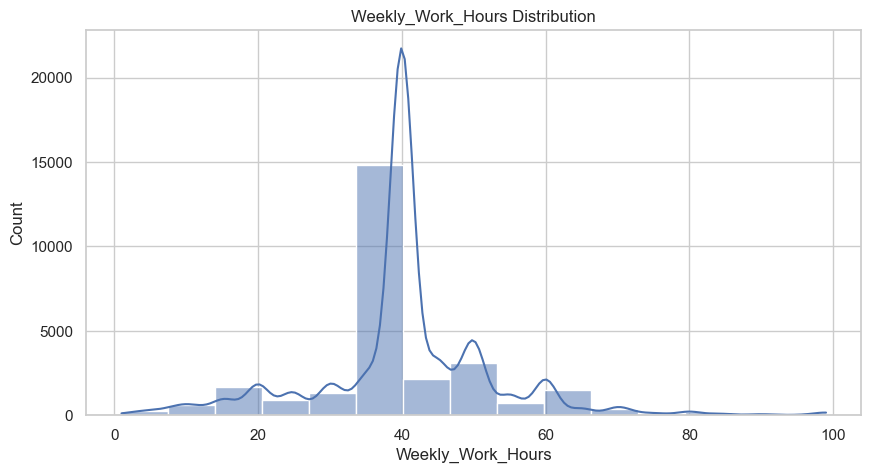

,Total,Approved,Rejected
count,27676.000000,6664.000000,21012.000000
mean,40.482151,45.454232,38.905245
std,12.371156,11.130271,12.327740
min,1.000000,1.000000,1.000000
25%,40.000000,40.000000,35.000000
50%,40.000000,40.000000,40.000000
75%,45.000000,50.000000,40.000000
max,99.000000,99.000000,99.000000


None Count: 0 (0.0% from total)
Outliers Count: 7632 (27.576% from total)


In [32]:
Weekly_Work_Hours_bounds = feature_analyze(df,'Weekly_Work_Hours', 15)

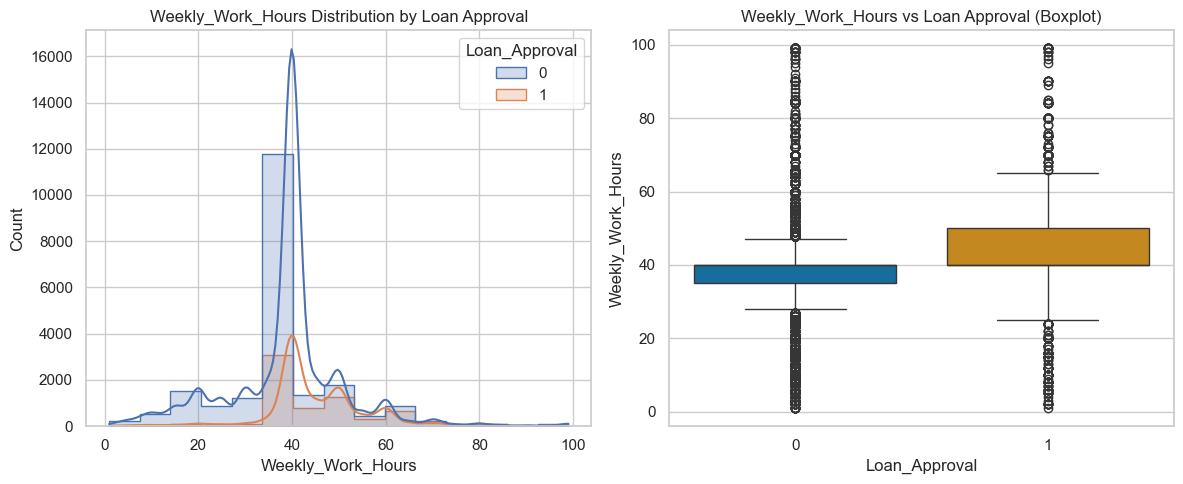

In [33]:
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Weekly_Work_Hours', hue="Loan_Approval", kde=True, element="step", bins=15)
plt.title("Weekly_Work_Hours Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Approval", y='Weekly_Work_Hours', palette="colorblind")
plt.title("Weekly_Work_Hours vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()


In [34]:
# Handle outliers and scale
lb = df['Weekly_Work_Hours'].quantile(0.01)
ub = df['Weekly_Work_Hours'].quantile(0.99)
df['Weekly_Work_Hours_scaled'] = df['Weekly_Work_Hours'].clip(lb,ub)
df['Weekly_Work_Hours_scaled'] = scaler.fit_transform(df[['Weekly_Work_Hours_scaled']])

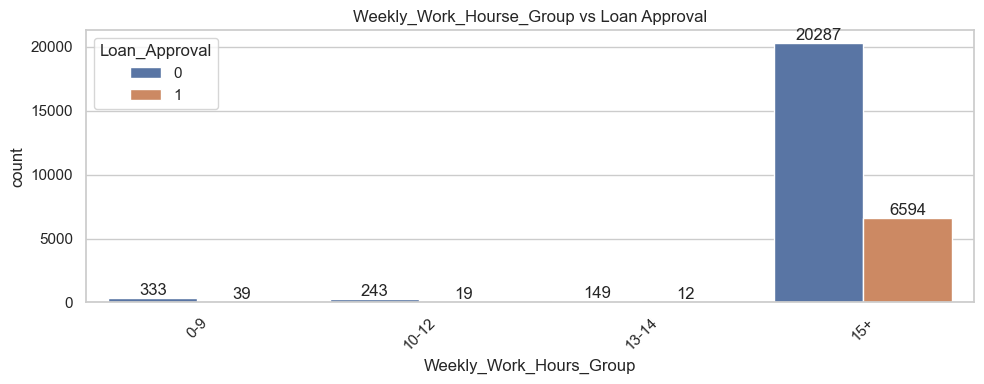

In [35]:
df['Weekly_Work_Hours_Group'] = pd.cut(df['Weekly_Work_Hours'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Weekly_Work_Hours_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Weekly_Work_Hourse_Group vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

So this looks like a reasonable partition to groups:

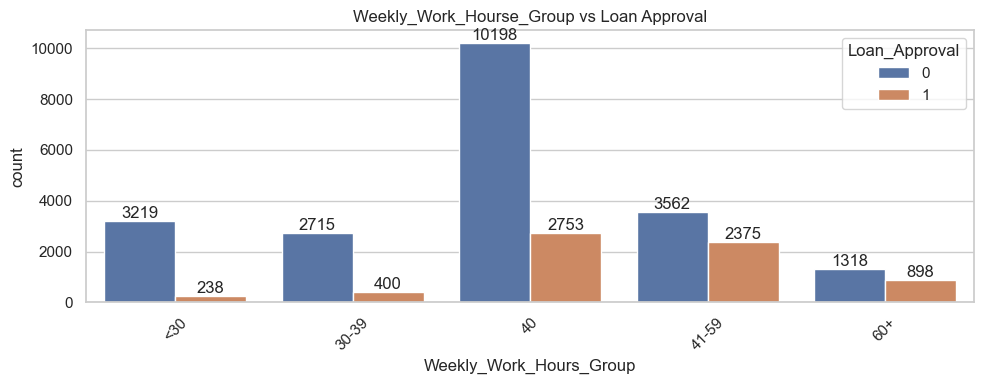

In [36]:
bins = [0, 30, 40, 41, 60, float('inf')]
labels = ['<30', '30-39', '40', '41-59', '60+'] 
df['Weekly_Work_Hours_Group'] = pd.cut(df['Weekly_Work_Hours'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Weekly_Work_Hours_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Weekly_Work_Hourse_Group vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations: Weekly_Work_Hours

- Weekly_Work_Hours appears to be predictive of Loan Approval — approved applicants tend to work more hours on average.
- No missing values were present.
- The feature showed a strong right-skew, with ~28% of values considered outliers.
- We created `Weekly_Work_Hours_scaled` to reduce model distortion - we applied winsorization by capping values at the 1st and 99th percentiles, and not by IQR since it clips to much observations and makes the feature less informative. Then we scaled with StandartScaler.
- Final range is now from 8 to 80 hours/week, preserving valid variation while reducing extreme influence.
- We created work hour groups with the following bins: `<30`, `30-39`, `40`, `41-60`, `60+`.
- These bins align with common job workload brackets and make the feature easier to interpret for tree-based models.

### **A:**

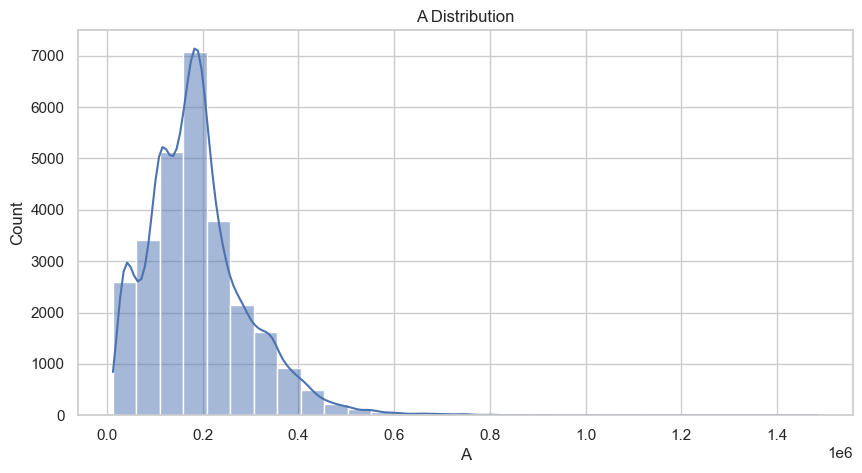

,Total,Approved,Rejected
count,2.767600e+04,6.664000e+03,2.101200e+04
mean,1.898849e+05,1.876668e+05,1.905884e+05
std,1.053593e+05,1.023111e+05,1.063005e+05
min,1.228500e+04,1.487800e+04,1.228500e+04
25%,1.177652e+05,1.185510e+05,1.176025e+05
50%,1.785870e+05,1.761850e+05,1.797150e+05
75%,2.376340e+05,2.309848e+05,2.394418e+05
max,1.484705e+06,1.226583e+06,1.484705e+06


None Count: 0 (0.0% from total)
Outliers Count: 837 (3.024% from total)


In [37]:
A_bounds = feature_analyze(df, 'A', 30)

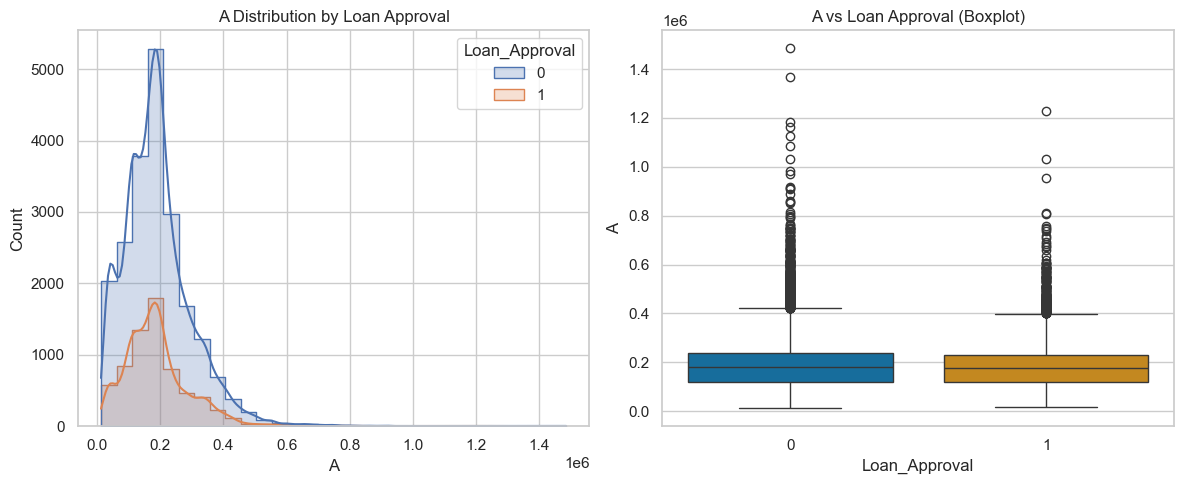

In [38]:
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='A', hue="Loan_Approval", kde=True, element="step", bins=30)
plt.title("A Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Approval", y='A', palette="colorblind")
plt.title("A vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()


It seems like the data `A` has a highly skewed distribution, so we'll try a sqrt transformation:

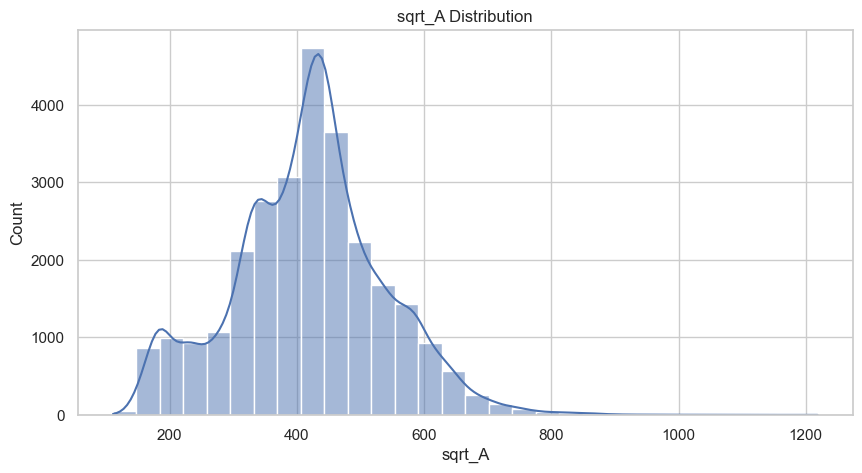

,Total,Approved,Rejected
count,27676.000000,6664.000000,21012.000000
mean,418.967447,417.135270,419.548526
std,119.798488,116.906000,120.698298
min,110.837719,121.975407,110.837719
25%,343.169419,344.312358,342.932209
50%,422.595551,419.743970,423.928060
75%,487.477179,480.608728,489.327855
max,1218.484715,1107.512077,1218.484715


None Count: 0 (0.0% from total)
Outliers Count: 333 (1.203% from total)


In [39]:
df['sqrt_A'] = np.sqrt(df['A'])
sqrt_A_bounds = feature_analyze(df, 'sqrt_A', 30)

The distribution looks way better!
Lets try exploring sqrt_A, maybe it'll be more informative:

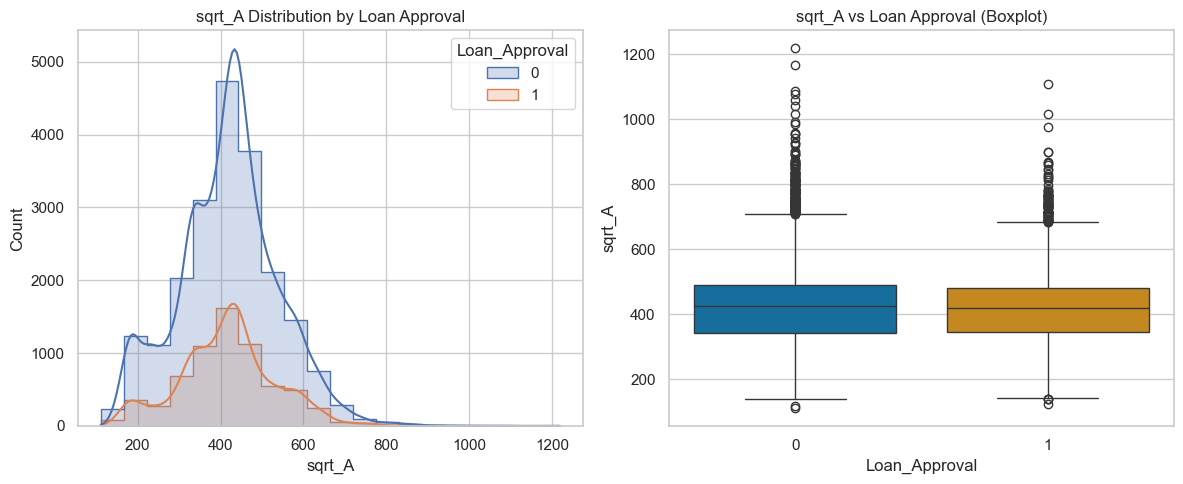

In [40]:
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='sqrt_A', hue="Loan_Approval", kde=True, element="step", bins=20)
plt.title("sqrt_A Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Approval", y='sqrt_A', palette="colorblind")
plt.title("sqrt_A vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()


In [41]:
df['sqrt_A_scaled'] = df['sqrt_A'].clip(sqrt_A_bounds[0],sqrt_A_bounds[1])
df['sqrt_A_scaled'] = scaler.fit_transform(df[['sqrt_A_scaled']])

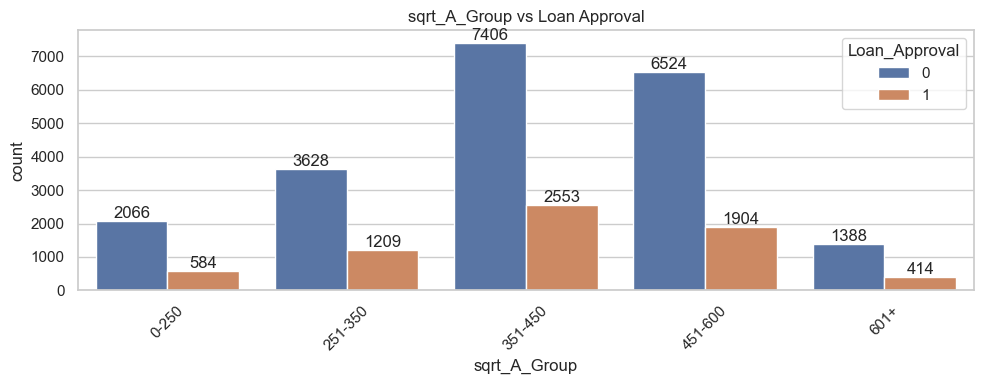

In [42]:
bins = [0, 250, 350, 450, 600, float('inf')] # these are used for determining the groups
labels = ['0-250', '251-350', '351-450', '451-600', '601+'] # labels to present in the plot
df['sqrt_A_Group'] = pd.cut(df['sqrt_A'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='sqrt_A_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title("sqrt_A_Group vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations: A 

- The raw feature `A` has a highly skewed distribution, therefore we created `sqrt_A`.
- sqrt transformation (`sqrt_A = sqrt(A)`) normalizes the distribution and makes it more interpretable for sensitive models like Logistic Regression and ANN. Then we also clipped outliers by IQR, and scaled with StandardScaler.
- We created a grouped version of `sqrt_A` with 5 bins to support possible use in tree-based models.


### **B:**

In [43]:
print(sum(df['B'].isnull()) - len(df))

0


#### Observations: B

The feature `B` is fully missing (100% NaN). It contains no usable data and will be dropped.


In [44]:
df.drop(columns=['B'], inplace=True)

### **D:**

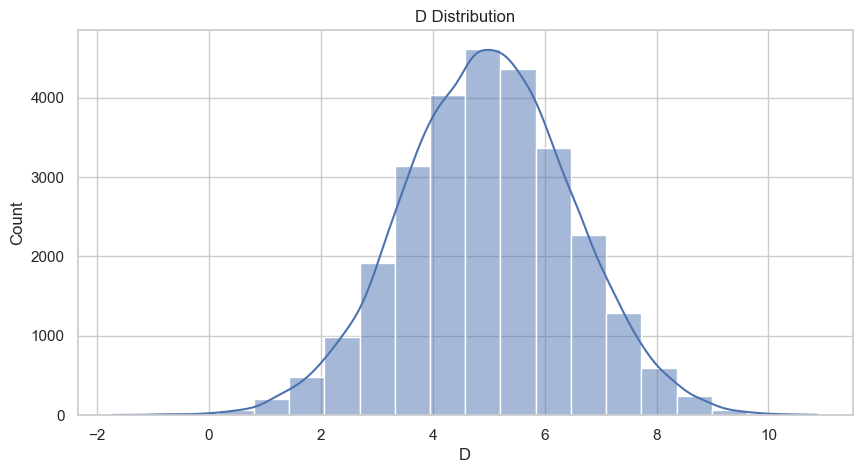

,Total,Approved,Rejected
count,27676.000000,6664.000000,21012.000000
mean,4.987450,4.987459,4.987448
std,1.511751,1.493452,1.517543
min,-1.711896,-1.023754,-1.711896
25%,3.968762,3.972606,3.967768
50%,4.994815,4.971689,4.999758
75%,5.999440,6.005133,5.997010
max,10.876204,10.481566,10.876204


None Count: 0 (0.0% from total)
Outliers Count: 203 (0.733% from total)


In [45]:
D_bounds = feature_analyze(df, 'D', 20)

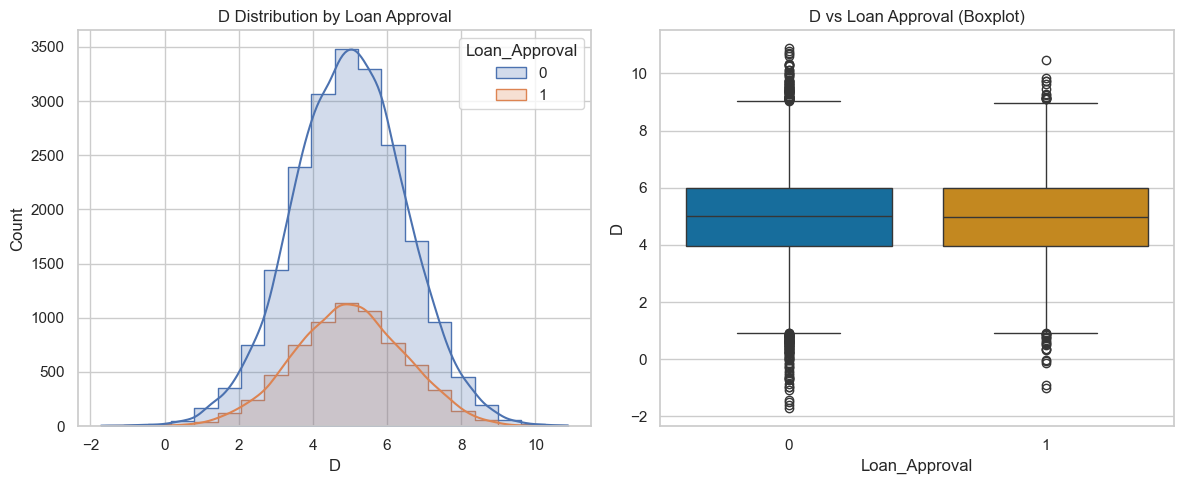

In [46]:
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='D', hue="Loan_Approval", kde=True, element="step", bins=20)
plt.title("D Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Approval", y='D', palette="colorblind")
plt.title("D vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()


In [47]:
# Scale
df['D_scaled'] = scaler.fit_transform(df[['D']])

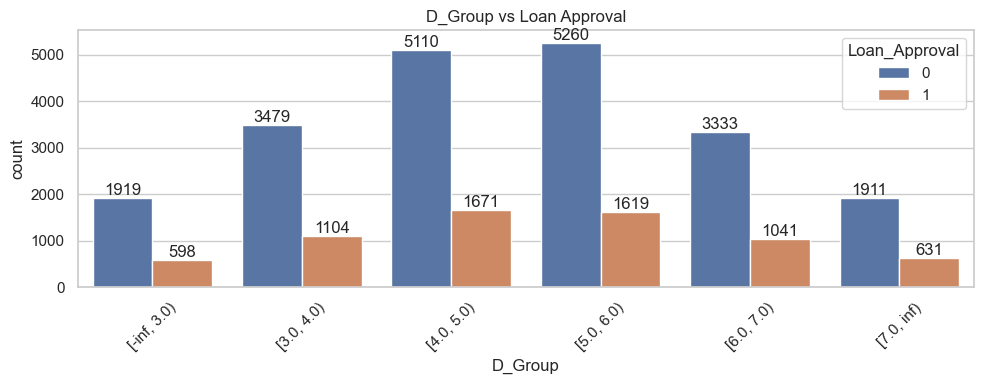

In [48]:
df['D_Group'] = pd.cut(df['D'], bins=[(-1) * float('inf'), 3, 4, 5, 6, 7, float('inf')], right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='D_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"D_Group vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations: D

- No missing values were present in this feature.
- Although ~0.7% of values were detected as outliers, they fall within a plausible scale.
- We created `D_Scaled` for models like Logistic Regression and ANN.
- We grouped `D` into buckets (`<3`, `3-4`, ..., `7+`) for clearer interpretation. This grouping may improve tree model splits.

### **C + E :**

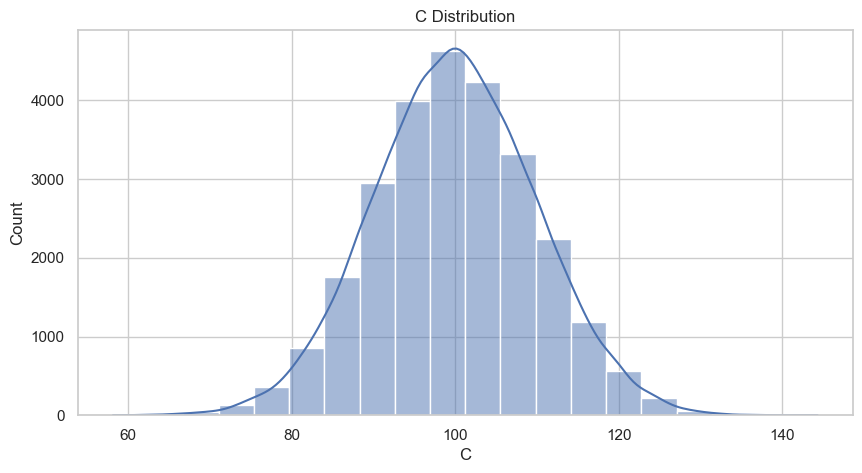

,Total,Approved,Rejected
count,26561.000000,6381.000000,20180.000000
mean,99.957601,100.134629,99.901624
std,9.911054,9.875401,9.921888
min,58.136513,58.136513,61.813295
25%,93.273986,93.530940,93.190838
50%,99.903569,100.132930,99.828707
75%,106.636563,106.865274,106.530241
max,144.309842,132.207681,144.309842


None Count: 1115 (4.029% from total)
Outliers Count: 177 (0.64% from total)


In [49]:
C_bounds = feature_analyze(df, 'C', 20)

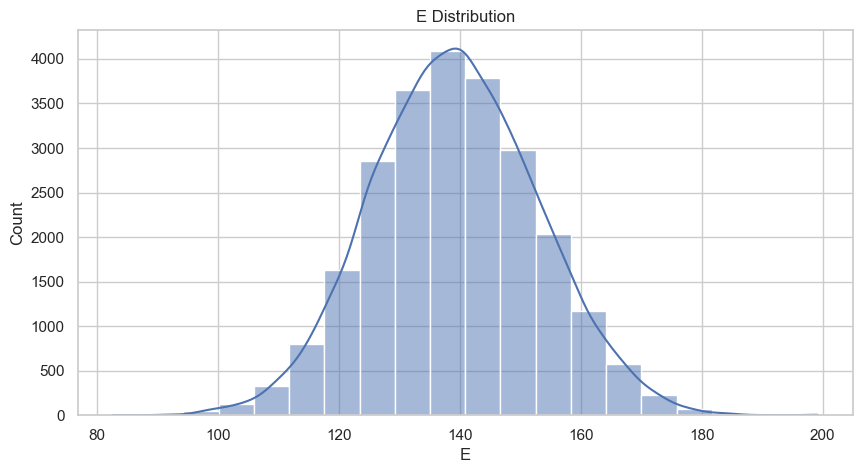

,Total,Approved,Rejected
count,24389.000000,5881.000000,18508.000000
mean,139.251615,142.279758,138.289409
std,13.708225,13.014133,13.783280
min,82.675954,92.011876,82.675954
25%,129.783073,133.654578,128.840066
50%,139.078247,142.277909,137.932472
75%,148.488675,151.108844,147.508136
max,199.134411,187.497982,199.134411


None Count: 3287 (11.877% from total)
Outliers Count: 151 (0.546% from total)


In [50]:
E_bouds = feature_analyze(df, 'E', 20)

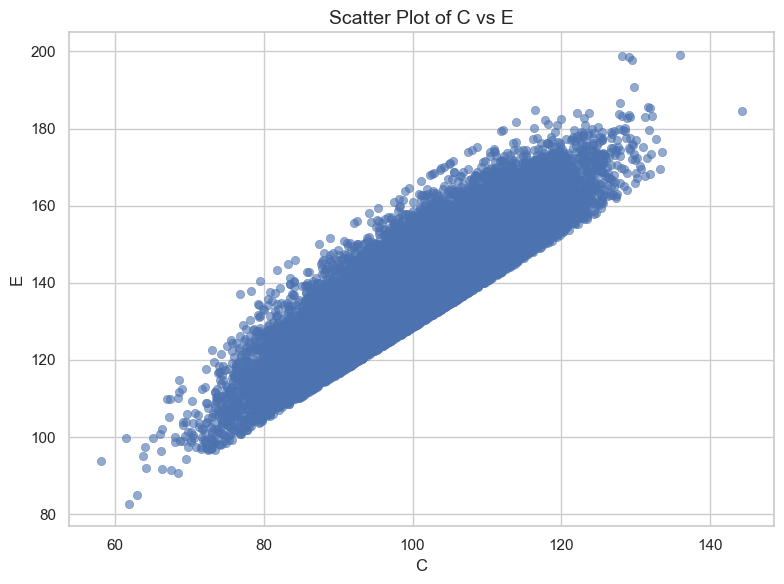

In [51]:
# Drop rows where either C or E is missing
df_scatter = df[['C', 'E']].dropna()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scatter, x='C', y='E', alpha=0.6, edgecolor=None)

plt.title("Scatter Plot of C vs E", fontsize=14)
plt.xlabel("C", fontsize=12)
plt.ylabel("E", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


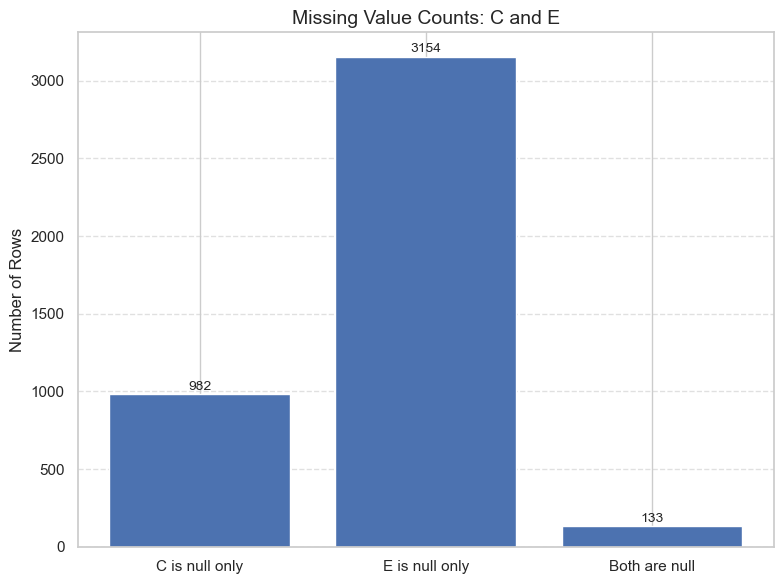

In [52]:
# Check the missing values distribution
c_null = df['C'].isna()
e_null = df['E'].isna()

# Create categories
conditions = [
    (c_null) & (~e_null),    # C is null only
    (~c_null) & (e_null),    # E is null only
    (c_null) & (e_null)      # Both are null
]

labels = ['C is null only', 'E is null only', 'Both are null']
counts = [condition.sum() for condition in conditions]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts)
plt.title("Missing Value Counts: C and E", fontsize=14)
plt.ylabel("Number of Rows", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f"{int(height)}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The columns have high linear correlation, also most of the observations with missing values are missing just one of the columns.Therefore we can fill missing values with `MICE`: 

In [53]:
df_copy = df.copy()

# Apply IterativeImputer to C and E
imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform
imputed_array = imputer.fit_transform(df_copy[['C', 'E']])

# Assign to new columns
df['C_imputed'] = imputed_array[:, 0]
df['E_imputed'] = imputed_array[:, 1]

In [54]:
print("Correlation between C_imputed and E_imputed:", df['E_imputed'].corr(df['C_imputed']))

Correlation between C_imputed and E_imputed: 0.884550337662495


Due to the high correlation between `C_imputed` and `E_imputed`, we will use just one of them in the models to avoid redundancy.
We prefer to use `C_imputed` because `C` has less missing values than `E`.
Now, let's analyze `C_imputed`:

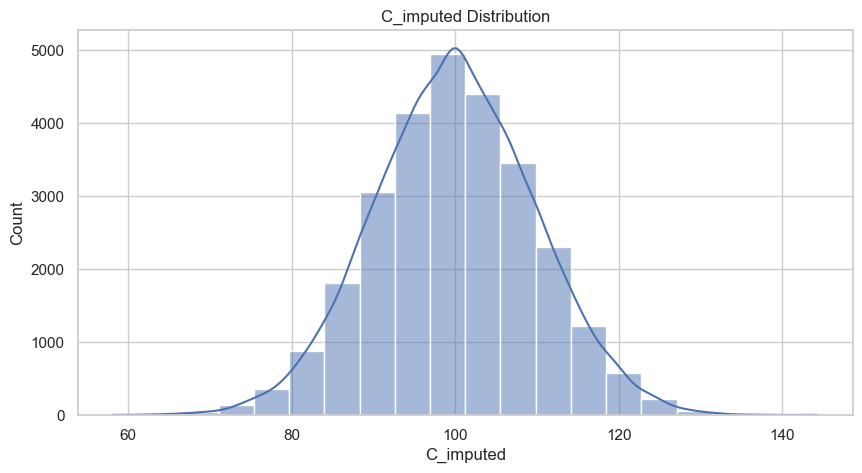

,Total,Approved,Rejected
count,27676.000000,6664.000000,21012.000000
mean,99.964755,100.230266,99.880548
std,9.851791,9.807262,9.864611
min,58.136513,58.136513,61.813295
25%,93.334659,93.742548,93.227989
50%,99.964755,100.172401,99.854816
75%,106.562943,106.857259,106.454019
max,144.309842,132.207681,144.309842


None Count: 0 (0.0% from total)
Outliers Count: 200 (0.723% from total)


In [55]:
C_imputed_bounds = feature_analyze(df, 'C_imputed', 20)

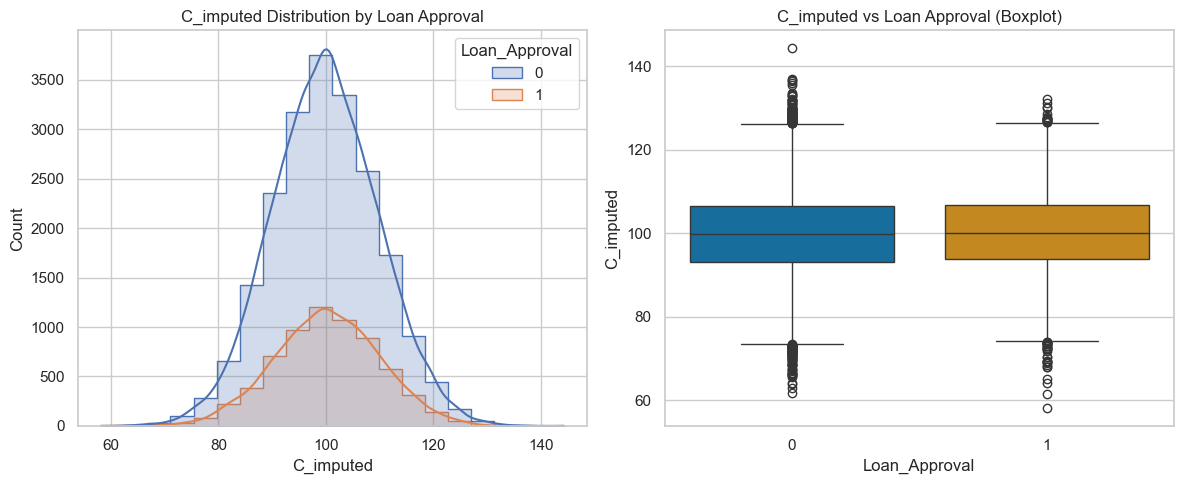

In [56]:
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='C_imputed', hue="Loan_Approval", kde=True, element="step", bins=20)
plt.title("C_imputed Distribution by Loan Approval")
    
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Approval", y='C_imputed', palette="colorblind")
plt.title("C_imputed vs Loan Approval (Boxplot)")
plt.tight_layout()
plt.show()


Outliers are rare and within a plausible numeric range, so we just need to scale:

In [57]:
df['C_imputed_scaled'] = scaler.fit_transform(df[['C_imputed']])

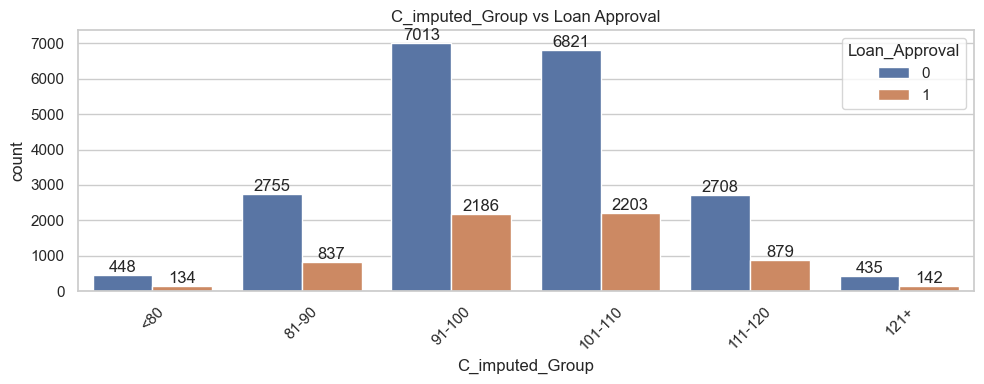

In [58]:
df['C_imputed_Group'] = pd.cut(df['C'], bins=[0, 80, 90, 100, 110, 120, float('inf')], labels=['<80', '81-90', '91-100', '101-110', '111-120', '121+'], right=False)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='C_imputed_Group', hue='Loan_Approval')
for container in ax.containers:
    ax.bar_label(container)
plt.title("C_imputed_Group vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations: C + E

- `C` and `E` have strong linear correlation. in addition Only **133 rows** have both values missing, while the majority have one or the other observed. therefore we used `MICE` to fill missing values
- Two new columns were created: `C_imputed` and `E_imputed`, both fully imputed and without missing values.
- Since `C` and `E` are highly correlated, using **both together** would introduce redundancy and may reduce model generalization. `E` has **more missing values** than `C`, therefore we will use `C_imputed` in the models.
- We created `C_imputed_Scaled` for models like Logistic Regression and ANN.
- We created `C_imputed_Grouped`, because grouped version may improve interpretability in tree-based models.

## **Target Variable: `Loan_Approval`**

We examine the distribution of the target variable `Loan_Approval`, which is binary:
- 1 = Approved
- 0 = Rejected

Understanding the class balance helps determine the appropriate modeling strategies (e.g., stratified splitting, class weighting).


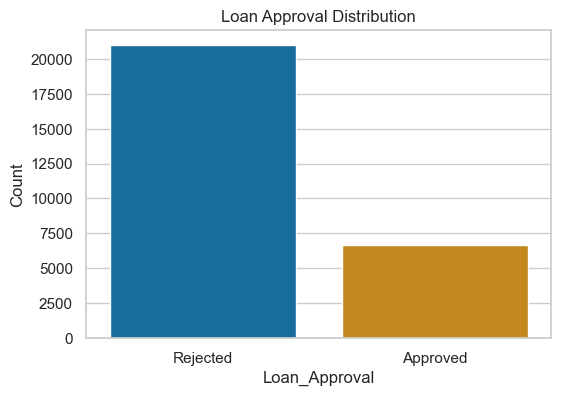

In [59]:

# --- TARGET DISTRIBUTION ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Loan_Approval", palette="colorblind")
plt.title("Loan Approval Distribution")
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.ylabel("Count")
plt.show()


### Observations: Target Variable - Loan_Approval

- The distribution is **highly imbalanced**, with approximately:
  - ~25% Approved
  - ~75% Rejected
- This imbalance has important implications for modeling:
  - We will use **stratified train/test splitting** to preserve the class distribution.
  - Models such as Logistic Regression will use **class_weight='balanced'**.

This analysis ensures that the model will be trained and evaluated fairly, avoiding bias toward the dominant class.


## Exploring Categorical Columns

### **Employment_Type:**

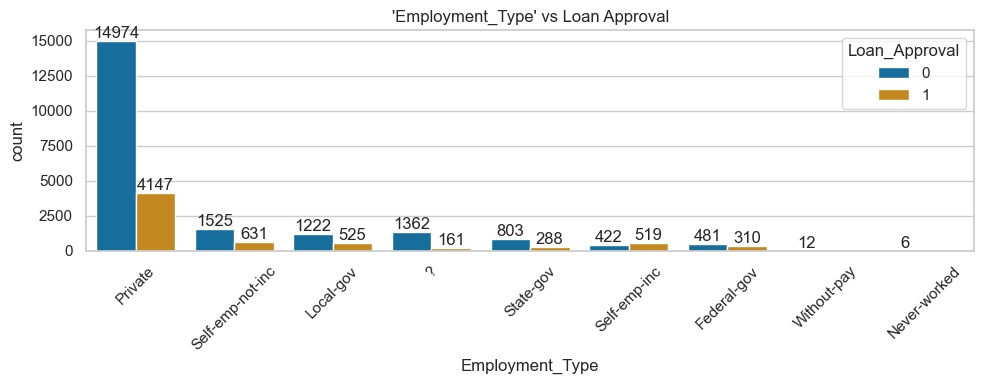

None Count:  288 
Percentage of Nones:  0.01


In [60]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Employment_Type', hue='Loan_Approval', palette="colorblind", order=df['Employment_Type'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Employment_Type' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Employment_Type'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

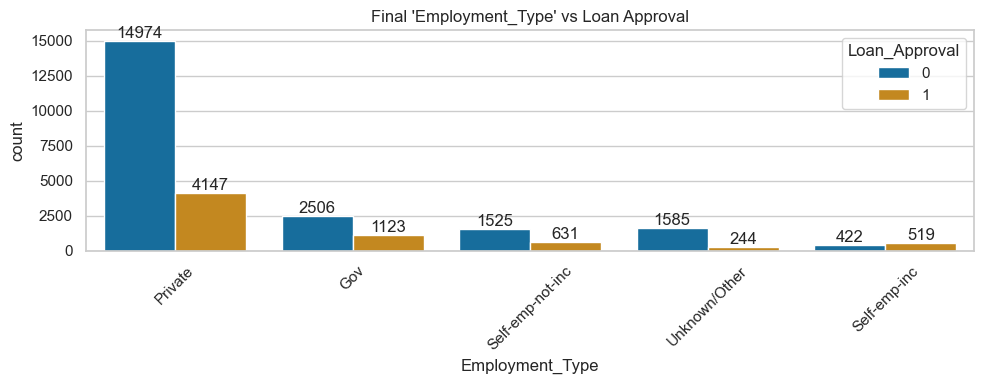

In [61]:
# Fill missing values with 'Unknown' and normalize '?' values
df['Employment_Type'] = df['Employment_Type'].fillna('Unknown')
df.loc[df['Employment_Type'] == '?', 'Employment_Type'] = 'Unknown'

# Group government-related jobs into 'Gov'
gov_categories = ['Local-gov', 'State-gov', 'Federal-gov']
df['Employment_Type'] = df['Employment_Type'].replace(gov_categories, 'Gov')

# Group very rare and low-approval categories into 'Other'
low_approval_categories = ['Never-worked', 'Without-pay', 'Unknown']
df['Employment_Type'] = df['Employment_Type'].replace(low_approval_categories, 'Unknown/Other')

# Final check: see the cleaned category distribution
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Employment_Type', hue='Loan_Approval', palette='colorblind',
                   order=df['Employment_Type'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Final 'Employment_Type' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Key Insights: Employment_Type

- We grouped rare, low-support values (`Without-pay`, `Never-worked`, `Unknown`) into `'Unknown/Other'`
- We combined government categories into `'Gov'`

### **Education_Level:**

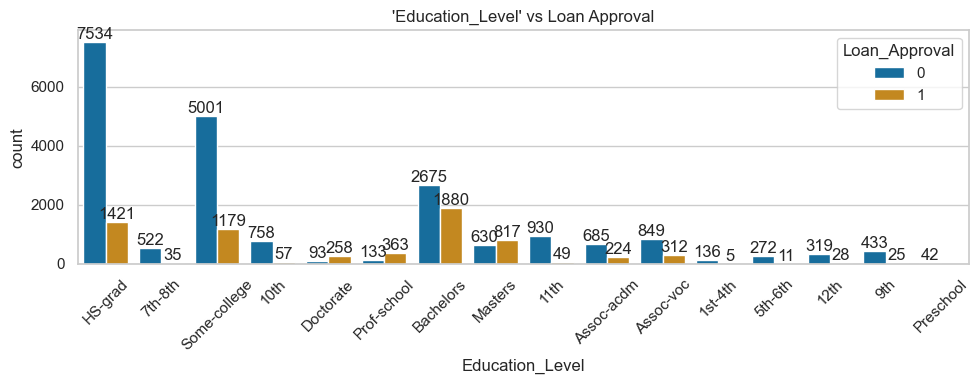

None Count:  0 
Percentage of Nones:  0.0


In [62]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Education_Level', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Education_Level' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Education_Level'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

In [63]:
education_order = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5,
    '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10,
    'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13, 'Masters': 14,
    'Prof-school': 15, 'Doctorate': 16
}
df['Education_Level'] = df['Education_Level'].map(education_order)

Relation between Education_Level and Years_of_Education:

In [64]:
print("Correlation between Education Level and Years of Education:", df['Education_Level'].corr(df['Years_of_Education']))

Correlation between Education Level and Years of Education: 1.0


therefore, we can drop one of them:

In [65]:
df.drop(columns=['Years_of_Education','Years_of_Education_Group'], axis=1, inplace=True)

In [66]:
# Create grouped tiers for interpretation
def group_education(level_num):
    if pd.isnull(level_num):
        return 'Unknown'
    elif level_num <= 4:
        return 'Low-Education'
    elif level_num <= 8:
        return 'High-School'
    elif level_num <= 12:
        return 'Some-College'
    elif level_num == 13:
        return 'Bachelors'
    else:
        return 'Higher-Education'

df['Education_Level_Group'] = df['Education_Level'].apply(group_education)

#### Key Insights: Education_Level

- We mapped `Education_Level` to an ordinal scale based on educational attainment.
- We found a strong positive correlation between education level and loan approval.
- To improve interpretability, we also created `Education_Level_Group` with 5 tiers:
  - Low-Education (<= 8th grade)
  - High-School
  - Some-College
  - Bachelors
  - Higher-Education (Masters, Doctorate, etc.)
- `Education_Level` was found to be perfectly correlated with `Years_of_Education` (corr = 1.0).
To avoid redundancy and multicollinearity, we will drop `Years_of_Education` because this feature has a missing values.


### **Marital_Status:**

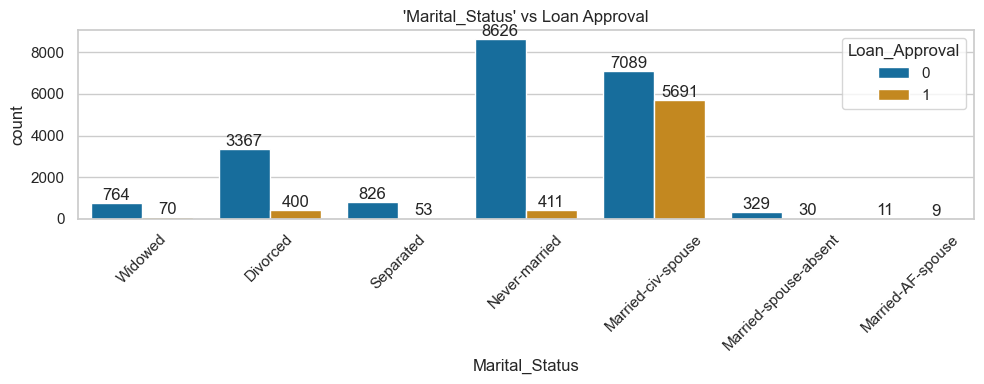

None Count:  0 
Percentage of Nones:  0.0


In [67]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Marital_Status', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Marital_Status' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Marital_Status'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

In [68]:
def group_marital(status):
    if status in ['Married-civ-spouse', 'Married-AF-spouse']:
        return 'Married'
    elif status == 'Never-married':
        return 'Single'
    elif status in ['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent']:
        return 'Not-Married'
    else:
        return 'Unknown'

df['Marital_Status_Grouped'] = df['Marital_Status'].apply(group_marital)


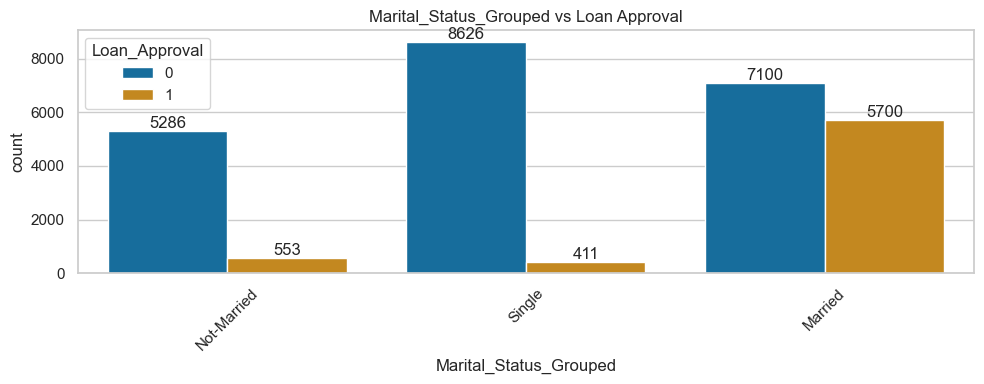

In [69]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Marital_Status_Grouped', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Marital_Status_Grouped vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Key Insights: Marital_Status
We created a new feature : `Marital_Status_Grouped` to support possible use in tree-based models or to increase the model generalization.
The groups are:
- `Married`: Married-civ-spouse, Married-AF-spouse
- `Single`: Never-married
- `Not-Married`: Divorced, Separated, Widowed, Married-spouse-absent


### **Job_Type:**

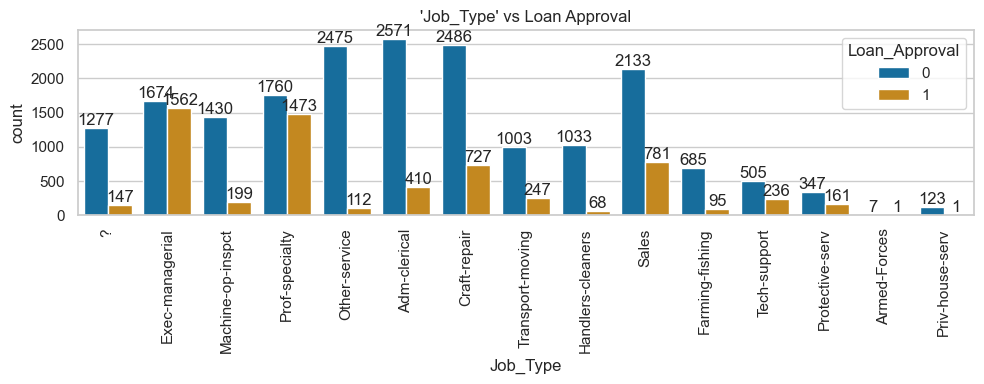

None Count:  1947 
Percentage of Nones:  0.07


In [70]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Job_Type', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Job_Type' vs Loan Approval")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

null_count = df['Job_Type'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

In [71]:
job_map = {
    # High approval + high-skill
    'Exec-managerial': 'High_White_Collar',
    'Prof-specialty': 'High_White_Collar',

    # Medium approval, skilled/support/service
    'Tech-support': 'Mid_White_Collar',
    'Sales': 'Mid_White_Collar',
    'Protective-serv': 'Mid_White_Collar',

    # Low approval, low autonomy white collar
    'Adm-clerical': 'Low_White_Collar',

    # Blue collar industrial
    'Craft-repair': 'Blue_Collar',
    'Machine-op-inspct': 'Blue_Collar',
    'Transport-moving': 'Blue_Collar',

    # Manual labor, very low approval
    'Farming-fishing': 'Manual_Labor',
    'Handlers-cleaners': 'Manual_Labor',
    'Priv-house-serv': 'Manual_Labor',

    # Noisy or rare categories
    'Other-service': 'Other_Unknown',
    'Armed-Forces': 'Other_Unknown',
    '?': 'Other_Unknown'
}

df['Job_Type_Grouped'] = df['Job_Type'].map(job_map)
df['Job_Type_Grouped'] = df['Job_Type_Grouped'].fillna('Other_Unknown')


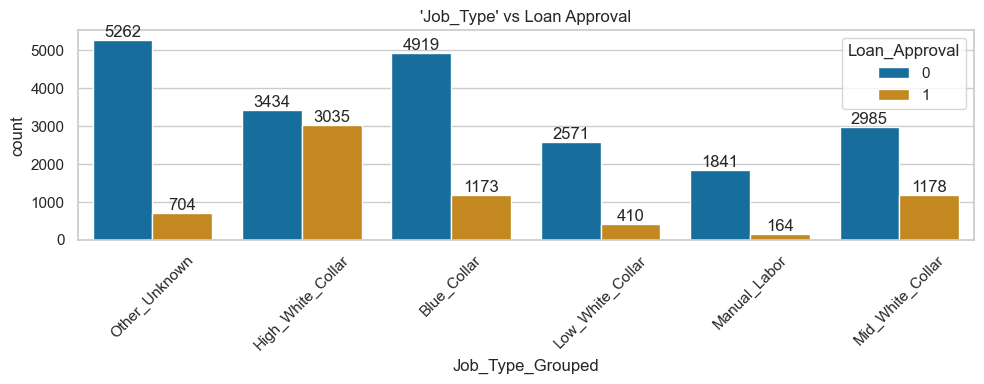

In [72]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Job_Type_Grouped', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Job_Type' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Key Insights: Job_Type

To improve model stability and interpretability, we applied selective grouping:

- **High_White_Collar**: `'Exec-managerial'`, `'Prof-specialty'`  
  High-skill, high-income roles with high approval rates

- **Mid_White_Collar**: `'Tech-support'`, `'Sales'`, `'Protective-serv'`  
  Medium-approval professional or support roles

- **Low_White_Collar**: `'Adm-clerical'`  
  Office-based, low-autonomy role with much lower approval

- **Blue_Collar**: `'Craft-repair'`, `'Machine-op-inspct'`, `'Transport-moving'`  
  Industrial and mechanical jobs with moderate approval

- **Manual_Labor**: `'Farming-fishing'`, `'Handlers-cleaners'`, `'Priv-house-serv'`  
  Physically demanding, low-income roles with very low approval

- **Other_Unknown**: `'Other-service'`, `'Armed-Forces'`, `'?'`, `None`  
  Unknown or very rare jobs, grouped to prevent model overfitting

### **Household_Role:**

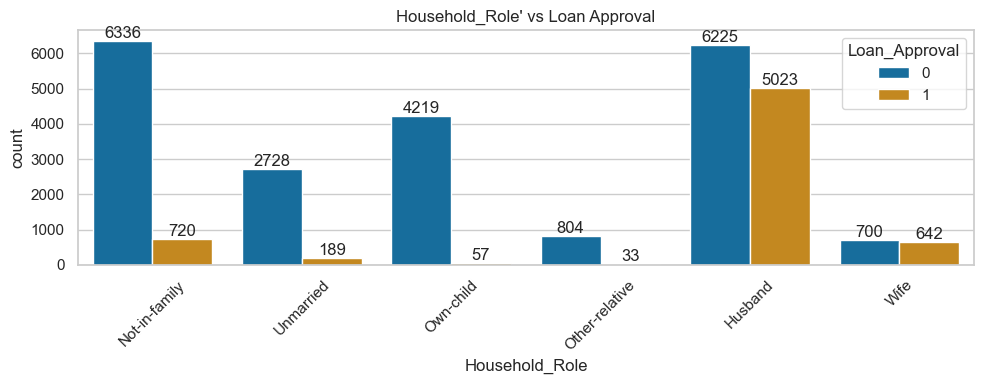

None Count:  0 
Percentage of Nones:  0.0


In [73]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Household_Role', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Household_Role' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Household_Role'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

In [74]:
def group_household_role(role):
    if role in ['Husband', 'Wife']:
        return 'Head'
    elif role == 'Own-child':
        return 'Child'
    elif role in ['Unmarried', 'Other-relative']:
        return 'Other'
    elif role == 'Not-in-family':
        return 'Single/Alone'
    else:
        return 'Unknown'

df['Household_Role_Grouped'] = df['Household_Role'].apply(group_household_role)

#### Key Insights: Household_Role
We detected strong correlation between `Household_Role` and `Marital_Status`.
To prevent multicollinearity in linear models, we may drop `Household_Role` and rely on `Marital_Status`. For tree-based models, we may retain both features.
If retained, we may group roles into broader categories (e.g., `Head`, `Child`, `Other`) to reduce noise from rare classes.


### **Ethnicity:**

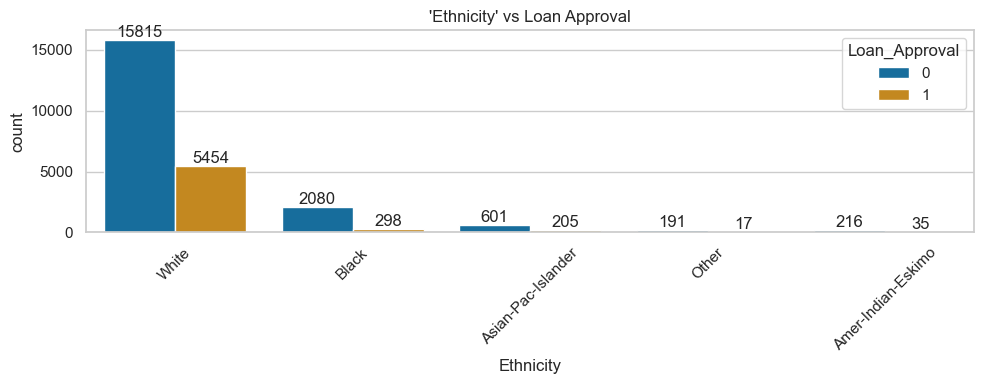

None Count:  2764 
Percentage of Nones:  0.1


In [75]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Ethnicity', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Ethnicity' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Ethnicity'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

In [76]:
# Fill missing values as 'Unknown' (already in your notebook)
df['Ethnicity'] = df['Ethnicity'].fillna('Unknown')

# Group rare ethnicities
def group_ethnicity(eth):
    if eth in ['Amer-Indian-Eskimo', 'Other']:
        return 'Other'
    else:
        return eth

df['Ethnicity_Grouped'] = df['Ethnicity'].apply(group_ethnicity)

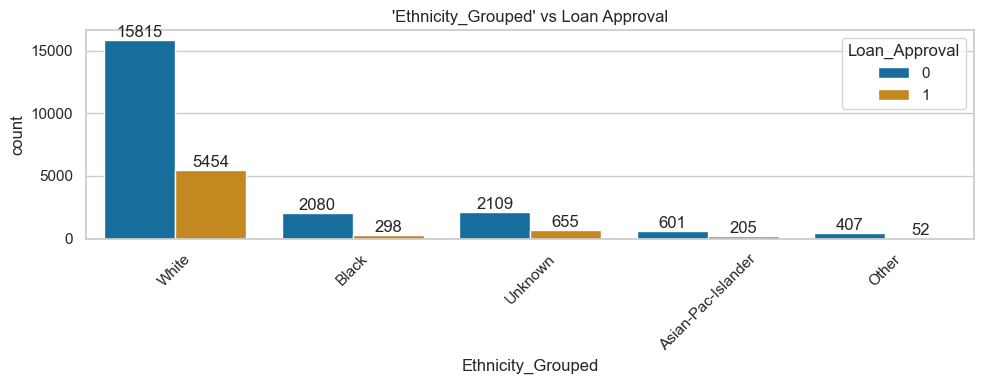

In [77]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Ethnicity_Grouped', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Ethnicity_Grouped' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Key Insights: Ethnicity
- The dataset is imbalanced, with `White` comprising ~70% of the data
- `Asian-Pac-Islander` shows a relatively high loan approval rate
- `Amer-Indian-Eskimo` and `Other` are rare and were grouped under `Other` to reduce noise
- Missing values (~10%) were labeled as `Unknown`

### **Gender:**

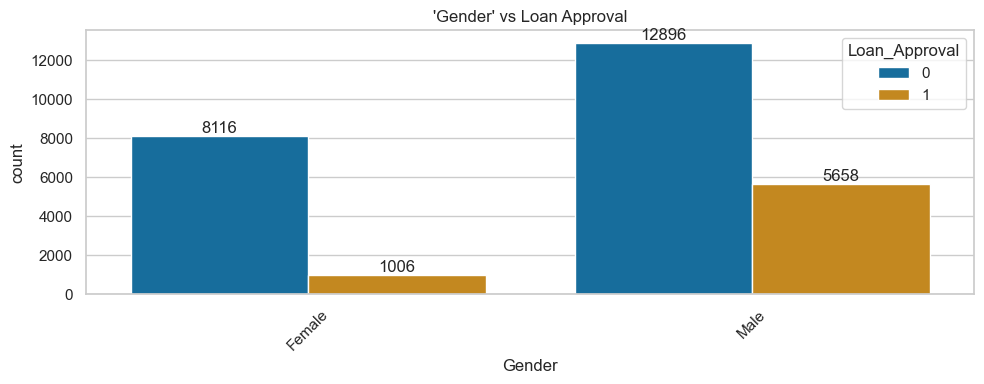

None Count:  0 
Percentage of Nones:  0.0


In [78]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Gender', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Gender' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Gender'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

In [79]:
# Binary encoding: Female = 1, Male = 0
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

#### Key Insights: Gender

- The `Gender` feature is binary and contains no missing values:
    - `Male`: 67%
    - `Female`: 33%
- We apply binary encoding: `Female = 1`, `Male = 0`, to simplify modeling and reduce dimensionality.

### **Country_of_Residence:**

In [80]:
print(df['Country_of_Residence'].value_counts(), '\n', 'Null:', df['Country_of_Residence'].isnull().sum())

Country_of_Residence
United-States                 24789
Mexico                          553
?                               496
Philippines                     167
Germany                         112
Canada                          104
Puerto-Rico                      96
El-Salvador                      88
India                            82
Cuba                             80
England                          76
Jamaica                          68
China                            67
South                            67
Vietnam                          60
Italy                            59
Dominican-Republic               57
Japan                            56
Guatemala                        53
Columbia                         52
Poland                           50
Taiwan                           46
Haiti                            37
Iran                             36
Portugal                         32
Nicaragua                        29
France                           26
Greece 

There are few observations from every category except from United-States, therefore we can combine all the other countries to one group.

In [81]:
# Replace '?' with 'Unknown'
df.loc[df['Country_of_Residence'] == '?', 'Country_of_Residence'] = 'Unknown'

# Replace all other countries except 'Unknown' and 'United-States' with 'Other'
df.loc[~df['Country_of_Residence'].isin(['Unknown', 'United-States']), 'Country_of_Residence'] = 'Other'


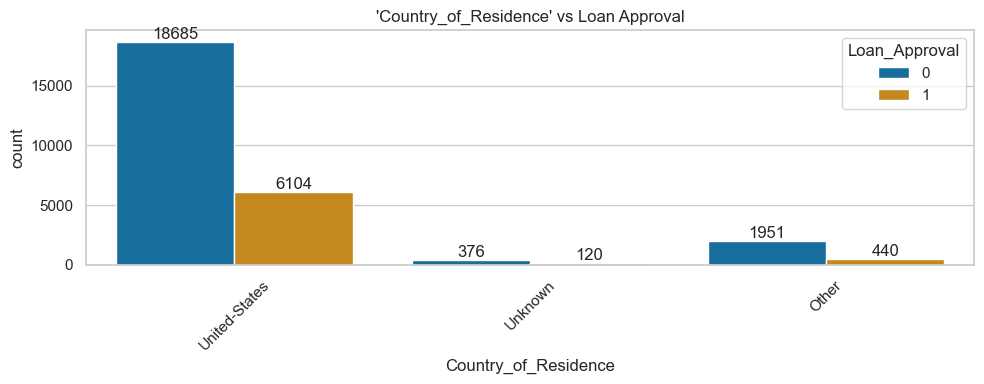

None Count:  0 
Percentage of Nones:  0.0


In [82]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Country_of_Residence', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Country_of_Residence' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Country_of_Residence'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

#### Key Insights: Country_of_Residence
- We replaced `'?'` entries with `'Unknown'`
- All non-US, non-missing countries were grouped into `'Other'` to reduce noise from sparse classes

### **Preferred_Communication_Method:**

In [83]:
print(df['Preferred_Communication_Method'].value_counts(), '\n', 'Null:', df['Preferred_Communication_Method'].isnull().sum())

Preferred_Communication_Method
Phone         4541
Mail          4522
mail          4458
Email         4448
email         4424
Phone_Call    4419
Name: count, dtype: int64 
 Null: 864


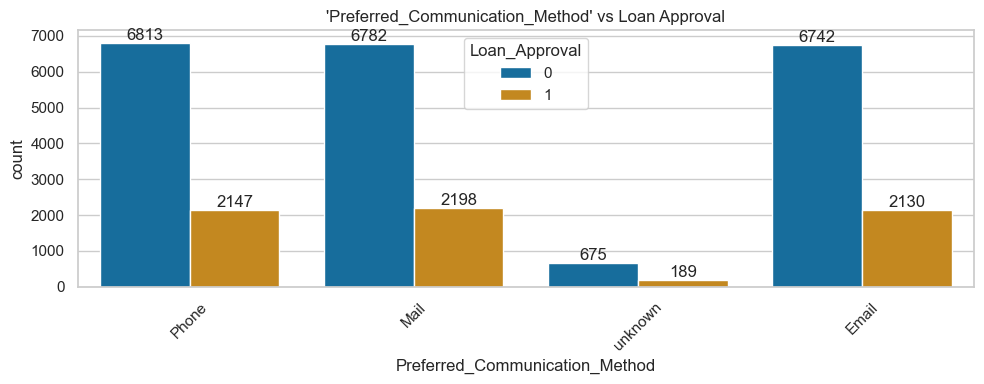

None Count:  0 
Percentage of Nones:  0.0


In [84]:
# Normalize Communication Method
df['Preferred_Communication_Method'] = df['Preferred_Communication_Method'].replace({
    'Phone_Call': 'Phone', 'email': 'Email', 'mail': 'Mail'})


# Fill missing communication
df['Preferred_Communication_Method'] = df['Preferred_Communication_Method'].fillna('unknown')

# Plot
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Preferred_Communication_Method', hue='Loan_Approval', palette="colorblind")
for container in ax.containers:
    ax.bar_label(container)
plt.title("'Preferred_Communication_Method' vs Loan Approval")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

null_count = df['Preferred_Communication_Method'].isnull().sum()
print('None Count: ', null_count, '\nPercentage of Nones: ', round(null_count / len(df), 3))

### Key Insights: Preferred_Communication_Method

- All variations were grouped into `'Phone'`, `'Email'` or `'Mail'`
- Missing values were labeled as `'Unknown'`

# Models

### K-Fold ROC Curve Visualization

We define a function `KfoldPlot` that evaluates the model's performance using K-Fold Cross Validation and visualizes the ROC curves across all folds. This visualization helps assess the **generalization ability** and **stability** of a classifier by showing how the ROC curve varies across the splits and what the average performance (mean AUC) looks like.



In [85]:
def KfoldPlot(X, y, clf, k):
    """
    Plot ROC curves for a classifier using K-Fold Cross Validation.

    Parameters:
    - X: Features (numpy array)
    - y: Labels (numpy array)
    - clf: A scikit-learn classifier that supports predict_proba
    - k: Number of folds (int)

    The function fits the classifier on each fold, computes the ROC curve and AUC, and plots:
    - ROC curves for each fold
    - Mean ROC curve with mean AUC
    """

    # Initialize K-Fold CV
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Setup to compute mean ROC curve
    mean_fpr = np.linspace(0, 1, 100)  # Fixed FPR points
    tprs = []  # List to hold interpolated TPRs for averaging

    plt.figure(figsize=(10, 8))

    # Cross-validation loop
    for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train and predict
        clf.fit(X_train, y_train)
        y_score = clf.predict_proba(X_test)[:, 1]  # Use probabilities for ROC

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_score)

        # Interpolate TPR at fixed FPR points for averaging
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        
        # Compute AUC for current fold
        fold_auc = auc(fpr, tpr)
        # Plot individual fold ROC curve
        plt.plot(fpr, tpr, lw=1, alpha=0.6, label=f'Fold {i+1}')
        
    # Compute and plot mean ROC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0  # Ensure curve ends at (1,1)
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, color='black',
             label=f'Mean ROC (AUC = {mean_auc:.4f})',
             lw=2, linestyle='--')

    # Diagonal line (random guessing)
    plt.plot([0, 1], [0, 1], linestyle=':', color='gray')

    # Formatting
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves per Fold with Mean ROC')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

### Test/ Validation Split

In [86]:
X = df.drop(columns='Loan_Approval')
y = df['Loan_Approval']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

We create seperate sets for tree based models and sensitive models (logistic regression and ANN).

In [87]:
# Tree based models sets

tree_cols = [
    'Age', 'Gender', 'Investment_Gain', 'Investment_Loss', 'Investment_Balance', 'Investment_Type',
    'Weekly_Work_Hours', 'D', 'A', 'Has_Investment', 'C_imputed',
    'Marital_Status_Grouped', 'Job_Type_Grouped', 'Household_Role_Grouped', 'Ethnicity_Grouped',
    'Employment_Type', 'Education_Level', 'Country_of_Residence', 'Preferred_Communication_Method'
]
X_tree = X[tree_cols]
 # Ecoding
categorial = X_tree.columns[(X_tree.dtypes == "object") | (X_tree.dtypes == "category")]
X_tree = pd.get_dummies(X_tree, columns=categorial, drop_first=True)
X_tree_train = X_tree.loc[X_train.index]
X_tree_val = X_tree.loc[X_val.index]

In [88]:
# Sensitive models sets
sensitive_models_cols = ['Age_scaled', 'Employment_Type', 'Education_Level',
       'Country_of_Residence', 'C_imputed_scaled', 'Preferred_Communication_Method', 'D_scaled','Investment_Balance_scaled',
       'Weekly_Work_Hours_scaled', 'sqrt_A_scaled',
       'Marital_Status_Grouped', 'Job_Type_Grouped',
       'Ethnicity_Grouped', 'Gender']


X_sens = X[sensitive_models_cols]
 
# Encoding
categorial = X_sens.columns[(X_sens.dtypes == "object") | (X_sens.dtypes == "category")]
X_sens= pd.get_dummies(X_sens, columns=categorial, drop_first=True)
X_sens_train = X_sens.loc[X_train.index]
X_sens_val = X_sens.loc[X_val.index]

## `Logistic Regrression`

- ### Best model selection:

In [89]:
# Grid Search for best Logistic Regression parameters
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'max_iter': [100],    # Default
              'solver': ['liblinear', 'lbfgs'],
              'tol': [0.0001]   # Default
              }

log_reg = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gsv = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
gsv.fit(X_sens, y)
lr_best_params = gsv.best_params_
print("Best Parameters:", lr_best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}


- ### Model Training:

In [90]:
# Define the optimal parameters
best_log_reg = LogisticRegression(**lr_best_params,random_state=42)
# Train
best_log_reg.fit(X_sens_train, y_train)

LogisticRegression(C=0.1, random_state=42)

- ### Evaluation:

AUC on Validation Set: 0.894455769545527
AUC on Train Set: 0.8953753069216579


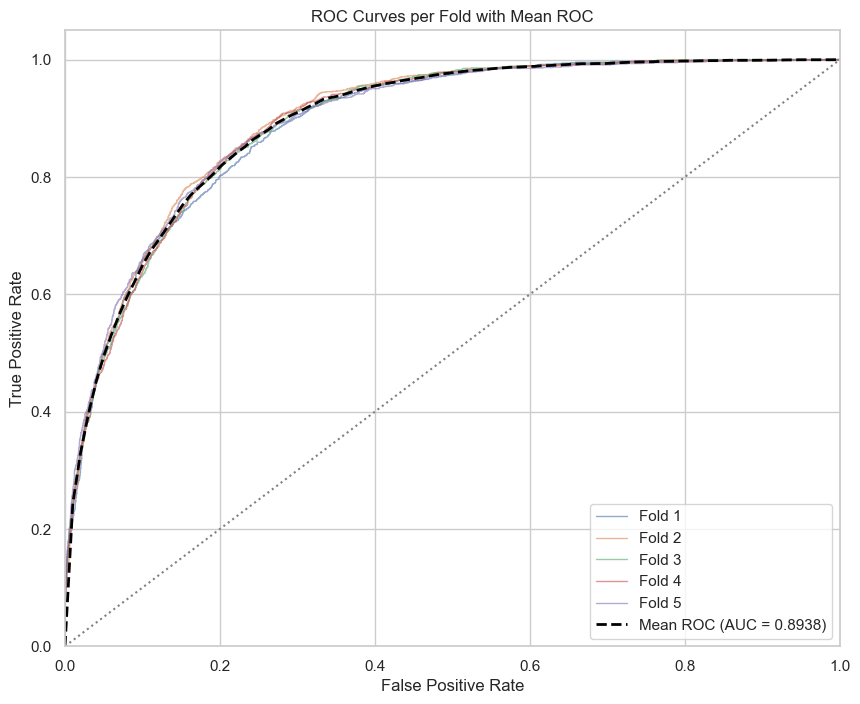

In [91]:
# Evaluate on validation set
y_val_pred = best_log_reg.predict(X_sens_val)
y_val_proba = best_log_reg.predict_proba(X_sens_val)[:, 1]
print("AUC on Validation Set:", roc_auc_score(y_val, y_val_proba))

# Evaluate on train set to check overfitting
y_train_proba = best_log_reg.predict_proba(X_sens_train)[:, 1]
print("AUC on Train Set:", roc_auc_score(y_train, y_train_proba))

# Evaluate by K-Fold  Cross  Validation
KfoldPlot(X_sens.values, y.values, best_log_reg, 5)

In general the model provides good results. As we can see the AUC difference between the Train set and the Validation set is less than 0.001. Therefore the model is not overfitted.

## `Decision Tree`

- ### Best model selection:

In [92]:
# Grid Search CV
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None],  # Default
    'class_weight': ['balanced']
    }

tree = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gsv_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

gsv_tree.fit(X_tree, y)
tree_best_params = gsv_tree.best_params_
print("Best Params:", tree_best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


- ### Model training:

In [93]:
# Define the optimal parameters
best_tree = DecisionTreeClassifier(**tree_best_params, random_state=42)

# Train
best_tree.fit(X_tree_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=10, random_state=42)

- ### Evaluation:

AUC on Validation Set: 0.8993235996365259
AUC on Train Set: 0.9238068348191643


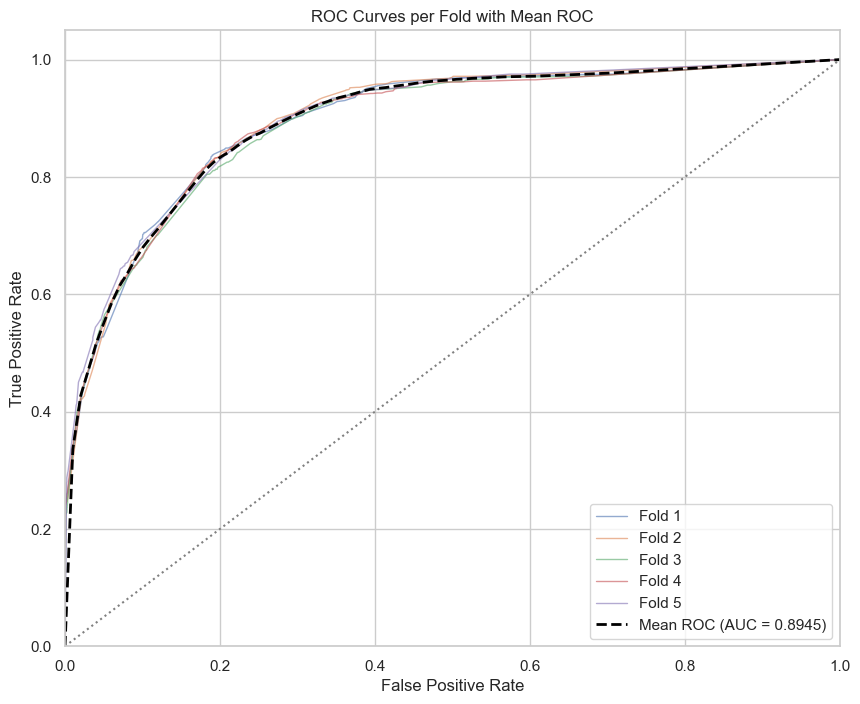

In [94]:
# Evaluate on validation set
y_val_pred = best_tree.predict(X_tree_val)
y_val_proba = best_tree.predict_proba(X_tree_val)[:, 1]
print("AUC on Validation Set:", roc_auc_score(y_val, y_val_proba))

# Evaluate on train set to check overfitting
y_train_proba = best_tree.predict_proba(X_tree_train)[:, 1]
print("AUC on Train Set:", roc_auc_score(y_train, y_train_proba))

# Evaluate by K-Fold  Cross  Validation
KfoldPlot(X_tree.values, y.values, best_tree, 5)

Like the logistic regression, the model provides good results in general. The AUC difference between the Train set and the Validation set is higher than in the logistic regression (~0.005), but its still very low. Therefore the model is not overfitted.

## `ANN`

Best Parameters: {'activation': 'logistic', 'batch_size': 32, 'hidden_layer_sizes': (64, 32, 16), 'learning_rate_init': 0.001, 'max_iter': 500, 'random_state': 42, 'solver': 'sgd'}
AUC Score: 0.9024236787248203

- ### Best model selection:

In [95]:

# ANN model + GridSearchCV
mlp = MLPClassifier(random_state=42)

param_grid = {'hidden_layer_sizes': [(32, 16), (64)],
    'activation': ['logistic', 'relu'],
    'batch_size' : [100],
    'learning_rate_init': [0.001],  # Default
    'solver': ['sgd'],
    'max_iter': [1000],
    'alpha': [0.0001],    # Default
    }

gsv_ann = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

gsv_ann.fit(X_sens, y)
ann_best_params = gsv_ann.best_params_
print("Best Parameters:", ann_best_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'sgd'}


- ### Model training:

In [96]:
best_ann = MLPClassifier(**ann_best_params, random_state=42)
best_ann.fit(X_sens_train, y_train)

MLPClassifier(batch_size=100, hidden_layer_sizes=(32, 16), max_iter=1000,
              random_state=42, solver='sgd')

- ### Evaluation:

AUC on Validation Set: 0.9060580634094998
AUC on Train Set: 0.913717471811551


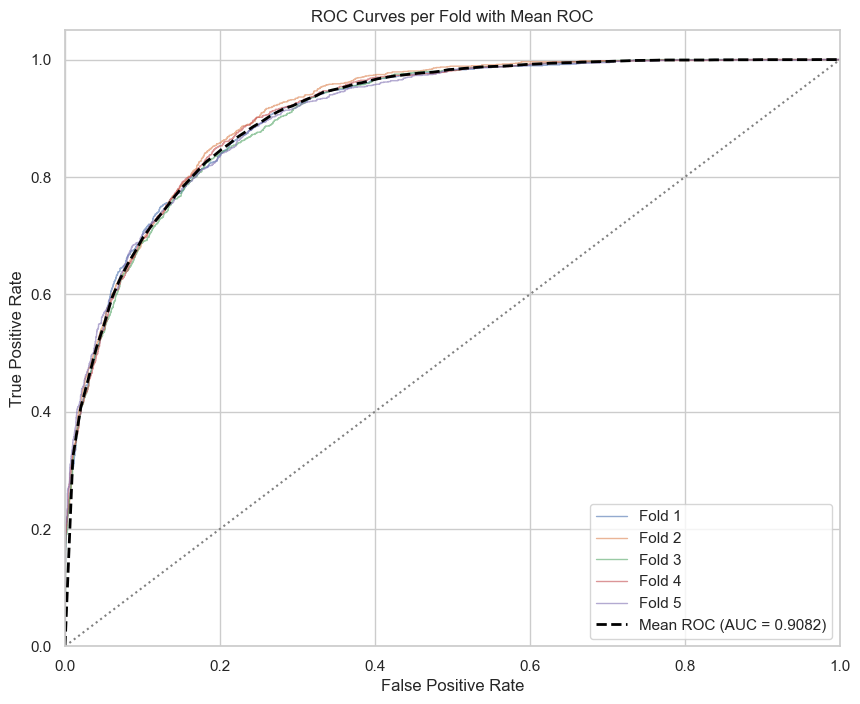

In [97]:
# Evaluate on validation set
y_val_pred = best_ann.predict(X_sens_val)
y_val_proba = best_ann.predict_proba(X_sens_val)[:, 1]
print("AUC on Validation Set:", roc_auc_score(y_val, y_val_proba))

# Evaluate on train set to check overfitting
y_train_proba = best_ann.predict_proba(X_sens_train)[:, 1]
print("AUC on Train Set:", roc_auc_score(y_train, y_train_proba))

# Evaluate by K-Fold  Cross  Validation
KfoldPlot(X_sens.values, y.values, best_ann, 5)

The ANN provides excellent results! Like the previous models there is a little difference between the Train set AUC and the Validation set AUC (~0.007), but its still not considered as an overfitting.

## `Random Forest`

- ### Best model selection:

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 1700}


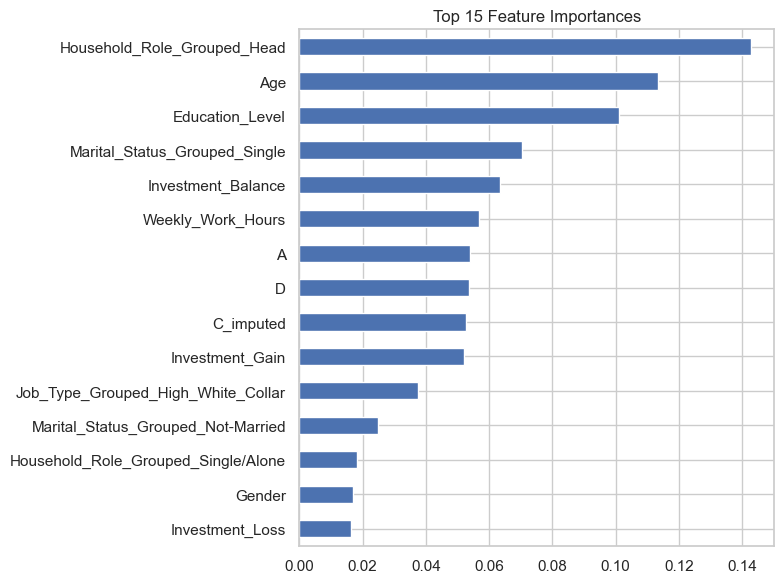

In [98]:

# GridSearchCV for RF
param_grid = {
    'n_estimators': [1000, 1700],
    'max_depth': [30, 40],
    'criterion': ['entropy'],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [5, 10],
    'class_weight': ['balanced'],
    'max_features': ['sqrt']    # Default
}

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gsv_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

gsv_rf.fit(X_tree, y)
rf_best_params = gsv_rf.best_params_
best_rf = gsv_rf.best_estimator_
print("Best Parameters:", rf_best_params)

# Plot feature importance
importances = pd.Series(best_rf.feature_importances_, index=X_tree.columns)
importances.nlargest(15).sort_values().plot(kind='barh', figsize=(8,6), title='Top 15 Feature Importances')
plt.tight_layout()
plt.show()

- ### Model training:

In [99]:
best_rf = RandomForestClassifier(**rf_best_params, random_state=42)
best_rf.fit(X_tree_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=1700, random_state=42)

- ### Evaluation:

AUC on Validation Set: 0.9153205503374414
AUC on Train Set: 0.9826604042891826


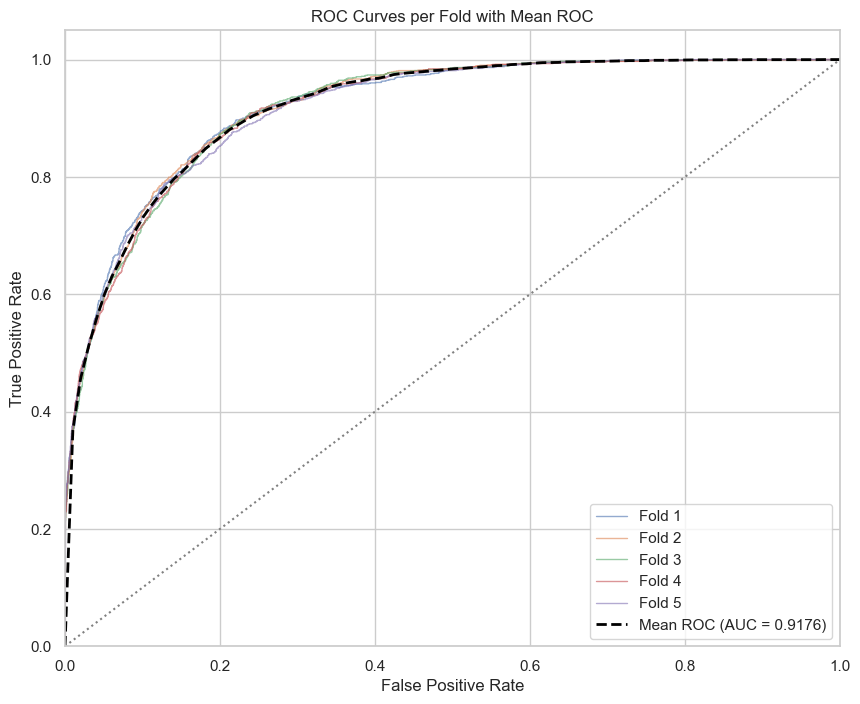

In [100]:
# Evaluate on validation set
y_val_pred = best_rf.predict(X_tree_val)
y_val_proba = best_rf.predict_proba(X_tree_val)[:, 1]
print("AUC on Validation Set:", roc_auc_score(y_val, y_val_proba))

# Evaluate on train set to check overfitting
y_train_proba = best_rf.predict_proba(X_tree_train)[:, 1]
print("AUC on Train Set:", roc_auc_score(y_train, y_train_proba))

# Evaluate by K-Fold  Cross  Validation
KfoldPlot(X_tree.values, y.values, best_rf, 5)

- ### Confusion Matrix:

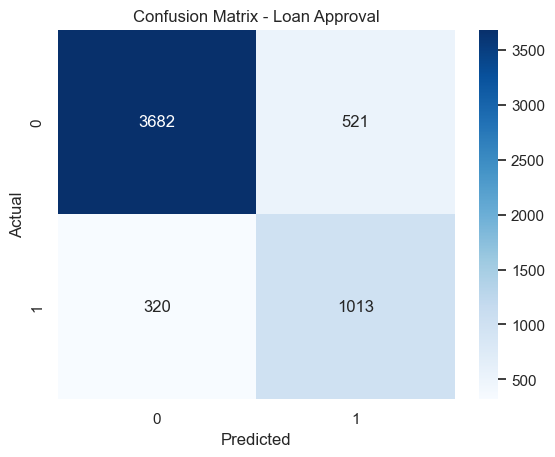

TP : 1013
FP : 521
FN : 320
TN : 3682
FPR : 0.1240
TPR : 0.7599
Accuracy       : 0.8481
Precision      : 0.6604
Recall         : 0.7599
F1 Score       : 0.7067
ROC AUC Score  : 0.9153


In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Approval")
plt.show()
print(f"TP : {tp}\nFP : {fp}\nFN : {fn}\nTN : {tn}")
print(f"FPR : {fp/(tn + fp):.4f}\nTPR : {tp/(tp + fn):.4f}")

# Binary classification metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
tree_auc = roc_auc_score(y_val, y_val_proba)  

# Print different scores
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")


### Confusion Matrix & Evaluation Summary

#### Confusion Matrix results:

- **True Positives (TP = 1013):** Customers who were actually approved and correctly predicted as approved.
- **True Negatives (TN = 3682):** Customers who were actually rejected and correctly predicted as rejected.
- **False Positives (FP = 521):** Customers who should have been rejected but were mistakenly approved by the model.
- **False Negatives (FN = 320):** Customers who should have been approved but were mistakenly rejected.

#### Performance Metrics:

- **Accuracy:** 0.8481 – the proportion of correct predictions over the total samples.
- **Precision:** 0.6604 – among the predicted approvals, 66% were actually correct.
- **Recall (TPR):** 0.7599 – the model captures around 76% of the actual approved customers.
- **False Positive Rate (FPR):** 0.1240 – about 12.4% of rejections were wrongly classified as approvals.

#### Bussiness Insights:
Making a **FP** means approving a customer who should have been rejected. its more costly than a **FN** - rejecting a customer who could have paid the loan.
Because of this, we want to **minimize the False Positive Rate (FPR)**, even if it slightly reduces recall. This trade-off helps ensure that approved customers are as reliable as possible, aligning the model with the organization's financial risk tolerance.



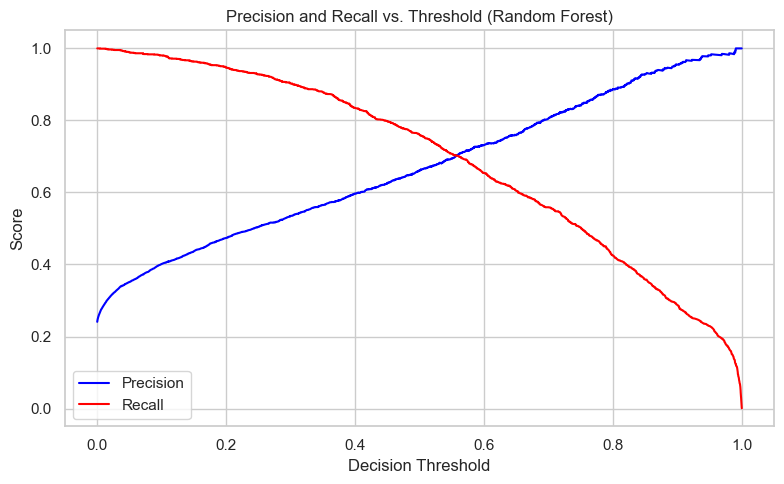

In [102]:
# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)

# Plot Precision and Recall vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold (Random Forest)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

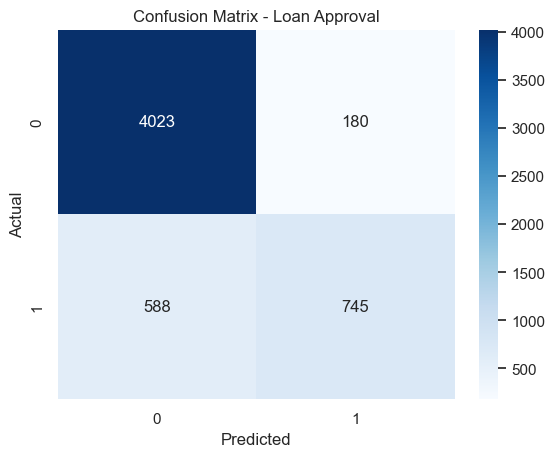

TP : 745
FP : 180
FN : 588
TN : 4023
FPR - 0.0428
TPR - 0.5589
Accuracy       : 0.8613
Precision      : 0.8054
Recall         : 0.5589
F1 Score       : 0.6599
ROC AUC Score  : 0.9153


In [ ]:
threshold = 0.7
y_val_adjusted = (y_val_proba >= threshold).astype(int)

cm = confusion_matrix(y_val, y_val_adjusted)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Approval")
plt.show()

print(f"TP : {tp}\nFP : {fp}\nFN : {fn}\nTN : {tn}")
print(f"FPR - {fp/(tn + fp):.4f}\nTPR - {tp/(tp + fn):.4f}")

# Binary classification metrics
accuracy = accuracy_score(y_val, y_val_adjusted)
precision = precision_score(y_val, y_val_adjusted)
recall = recall_score(y_val, y_val_adjusted)

# Print different scores
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")

We tuned the classification threshold to 0.7 in order to **minimize the FPR**.
By adjusting the threshold:
- We reduced FPR significantly (from **12.4% to 4.3%**).
- Precision improved from **66% to 80.5%**, meaning approvals are now more reliable.
- Recall dropped (from **~76% to ~56%**), but this is acceptable given the reduced financial risk.

# Prediction On The Test Train
- ### Create test set df:

In [104]:
test_df = pd.read_csv('test.csv')
test_df.head()

,customer_id,Age,Employment_Type,A,Education_Level,Years_of_Education,Marital_Status,Job_Type,Household_Role,Ethnicity,Gender,Investment_Gain,Investment_Loss,Weekly_Work_Hours,Country_of_Residence,C,Preferred_Communication_Method,D,B,E
0,115894,66.0,?,186061,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40,United-States,118.158870,Mail,6.543254,NaN,174.790644
1,115924,52.0,Private,198863,Prof-school,15.0,Divorced,NaN,Not-in-family,White,Male,0.0,2559.0,60,United-States,78.577481,Phone,6.592218,NaN,120.292977
2,115926,60.0,Self-emp-not-inc,205246,HS-grad,9.0,Never-married,Exec-managerial,Not-in-family,Black,Male,0.0,2559.0,50,United-States,99.078586,email,5.770193,NaN,148.894303
3,115928,53.0,Private,149650,HS-grad,9.0,Never-married,Sales,Not-in-family,White,Male,0.0,2559.0,48,United-States,90.506664,Phone,3.328335,NaN,135.107997
4,115933,43.0,Private,115806,Masters,14.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,2547.0,40,United-States,99.206458,Mail,4.036616,NaN,140.547750


- ### Feature engineering:

In [105]:
# Age
median_age = test_df['Age'].median()
test_df['Age'] = test_df['Age'].fillna(median_age)

# Invesments
test_df['Investment_Gain'] = test_df['Investment_Gain'].fillna(0)
test_df['Investment_Loss'] = test_df['Investment_Loss'].fillna(0)
test_df['Investment_Balance'] = test_df['Investment_Gain'] - test_df['Investment_Loss']
test_df['Investment_Type'] = test_df.apply(investment_type, axis=1)
test_df['Has_Investment'] = (test_df['Investment_Balance'] != 0).astype(int)

# C + E
test_df[['C_imputed', 'E_imputed']] = imputer.transform(test_df[['C', 'E']])

# Gender
test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})

# Education_Level
test_df['Education_Level'] = test_df['Education_Level'].map(education_order)

# Country_of_Residence
test_df.loc[test_df['Country_of_Residence'] == '?', 'Country_of_Residence'] = 'Unknown'
test_df.loc[~test_df['Country_of_Residence'].isin(['Unknown', 'United-States']), 'Country_of_Residence'] = 'Other'

# Preferred_Communication_Method
test_df['Preferred_Communication_Method'] = test_df['Preferred_Communication_Method'].replace({
    'Phone_Call': 'Phone', 'email': 'Email', 'mail': 'Mail'})
test_df['Preferred_Communication_Method'] = test_df['Preferred_Communication_Method'].fillna('unknown')

# Employment_Type
test_df['Employment_Type'] = test_df['Employment_Type'].fillna('Unknown')
test_df.loc[test_df['Employment_Type'] == '?', 'Employment_Type'] = 'Unknown'
test_df['Employment_Type'] = test_df['Employment_Type'].replace(gov_categories, 'Gov')
test_df['Employment_Type'] = test_df['Employment_Type'].replace(low_approval_categories, 'Unknown/Other')

# Marital_Status
test_df['Marital_Status_Grouped'] = test_df['Marital_Status'].apply(group_marital)

# Job_Type
test_df['Job_Type_Grouped'] = test_df['Job_Type'].map(job_map)
test_df['Job_Type_Grouped'] = test_df['Job_Type_Grouped'].fillna('Other_Unknown')

# Household_Role
test_df['Household_Role_Grouped'] = test_df['Household_Role'].apply(group_household_role)

# Ethnicity
test_df['Ethnicity'] = test_df['Ethnicity'].fillna('Unknown')
test_df['Ethnicity_Grouped'] = test_df['Ethnicity'].apply(group_ethnicity)


In [106]:

# Columns filtering
X_test = test_df[tree_cols]

# Encoding
categorial = X_test.columns[(X_test.dtypes == "object") | (X_test.dtypes == "category")]
X_test = pd.get_dummies(X_test, columns=categorial, drop_first=True)


- ### Predict:

In [131]:
# Train the chosen model on the data (train + validation)
best_rf.fit(X_tree, y)

# Predict
y_test_proba = best_rf.predict_proba(X_test)[:, 1]


- ### Save the predict as csv file:

In [136]:
predict_prob = pd.Series(y_test_proba, name='predict_prob')
prediction_df = pd.concat([test_df['customer_id'], predict_prob], axis=1)
prediction_df.to_csv("Submission_group_15.csv", index=False)

End Time

In [109]:
end = time.perf_counter()
print(f"The time it took to run the entire code is: {(end - start)/60} minutes")

The time it took to run the entire code is: 34.793046811665405 minutes
